#Business Understanding

**Konteks**

Dalam industri minuman fermentasi seperti anggur atau wine, kualitas produk merupakan faktor utama yang menentukan kepuasan konsumen dan daya saing di pasar. Kualitas anggur biasanya ditentukan melalui uji cita rasa oleh para ahli, yang memerlukan waktu, biaya, dan tenaga ahli yang terbatas.
Namun, perkembangan teknologi analisis data memungkinkan proses penilaian kualitas dilakukan secara otomatis berdasarkan data kimia yang dihasilkan selama proses produksi. Data tersebut mencakup berbagai parameter seperti tingkat keasaman, kadar gula, pH, dan kadar alkohol yang memengaruhi cita rasa dan mutu akhir produk. Oleh karena itu, perusahaan produsen anggur membutuhkan sistem analisis dan prediksi yang dapat memperkirakan kualitas anggur berdasarkan karakteristik kimianya secara efisien dan objektif.

**Problem Statement**

Perusahaan menghadapi tantangan dalam menentukan kualitas anggur secara cepat dan akurat tanpa bergantung sepenuhnya pada uji cita rasa manual.
Dengan mempertimbangkan berbagai variabel seperti fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH, sulphates, dan kadar alkohol, diperlukan model prediktif yang mampu mengklasifikasikan atau memperkirakan nilai quality dari setiap sampel anggur.

Masalah ini penting karena kesalahan dalam penilaian kualitas dapat berdampak pada reputasi merek, kepercayaan konsumen, dan efisiensi proses produksi. Dengan memiliki model yang dapat memprediksi kualitas secara otomatis, perusahaan dapat meningkatkan kontrol mutu, menghemat biaya pengujian, dan mengoptimalkan formulasi produk.

**Tujuan**

Berdasarkan konteks dan permasalahan di atas, analisis ini bertujuan untuk:

1. Membangun model prediksi kualitas anggur menggunakan data karakteristik kimia yang tersedia.

2. Menentukan variabel-variabel utama yang paling berpengaruh terhadap penilaian kualitas anggur.

3. Meningkatkan efisiensi dan objektivitas proses penilaian kualitas dengan menggantikan sebagian peran evaluasi manual menggunakan model berbasis data.

4. Memberikan insight bagi produsen untuk mengontrol dan menyesuaikan parameter kimia dalam proses produksi guna menghasilkan anggur dengan kualitas optimal.

##Data Undrestanding

Import library yang diperlukan

In [98]:
#Panggil file
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

dataset = '/content/data_training.csv'
wine = pd.read_csv(dataset)

print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB
None


Berikut merupakan lima baris pertama dan terakhir dari datset

In [99]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


Data tersebut merupakan data yang menggambarkan komposisi dari berbagai jenis anggur. Berikut merupakan variabel-variabel yang terdapat pada dataset.

1. Fixed Acidity: Mengacu pada keasaman utama yang tidak mudah menguap dalam anggur.
2. Volatile Acidity: Mengukur jumlah asam asetat dalam anggur. Tingkat keasaman volatil yang tinggi dapat mengindikasikan pembusukan.
3. Citric Acid: Asam sitrat dapat menambah "kesegaran" dan rasa pada anggur.
4. Residual Sugar: Mengacu pada jumlah gula yang tersisa setelah fermentasi.
5. Chlorides: Mengukur jumlah garam dalam anggur.
6. Free sulfur dioxide: Bentuk SO2 bebas mencegah pertumbuhan mikroba dan oksidasi anggur.
7. Total sulfur dioxide: Jumlah SO2 bebas dan terikat.
8. Density: Kepadatan anggur.
9. pH: Mengukur tingkat keasaman atau kebasaan anggur.
10. Sulphates: Ditambahkan untuk meningkatkan tingkat SO2, yang bertindak sebagai agen antimikroba dan antioksidan.
11. Alcohol: Mengukur kandungan alkohol dalam anggur.
12. Quality: Merupakan skor kualitas anggur, biasanya antara 0 (sangat buruk) dan 10 (sangat baik).
13. Id: Merupakan pengidentifikasi unik untuk setiap entri data.

Data yang dimiliki mencakup berbagai variabel yang berkaitan dengan informasi komposisi anggur. Setiap baris mewakili satu jenis anggur, sementara setiap kolom menunjukkan fitur yang dapat digunakan untuk memprediksi kualitas dari anggur.

Melakukan pengecekan apakah ada data yang hilang

In [100]:
print(f'Jumlah baris dan kolom di dataset wine adalah {wine.shape}')
wine.info()

Jumlah baris dan kolom di dataset wine adalah (857, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


In [101]:
np.sum(wine.isnull())

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Terlihat bahwa tidak ada data yang hilang. Data untuk setiap variabel berjumlah sama yakni 857 data.

Selanjutnya dilakukan identifikasi deskripsi serta isi unik dari setiap variabel

In [102]:
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


In [103]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in wine.columns :
    listItem.append( [col, wine[col].nunique(), wine[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,fixed acidity,87,"[7.3, 8.1, 10.1, 12.9, 8.4, 9.6, 8.5, 6.9, 6.0, 7.9, 9.3, 7.6, 6.6, 13.0, 7.7, 9.1, 11.1, 9.7, 11.4, 11.5, 9.8, 6.7, 10.8, 7.1, 6.8, 6.4, 7.0, 8.2, 8.8, 10.4, 6.5, 7.2, 5.9, 9.9, 10.7, 13.5, 8.0, 12.5, 9.0, 8.9, 7.5, 12.6, 5.3, 10.3, 7.4, 6.1, 12.8, 12.0, 6.2, 10.5, 7.8, 8.3, 11.3, 8.6, 6.3, 9.4, 13.3, 8.7, 9.2, 5.4, 5.6, 9.5, 10.0, 5.0, 11.9, 15.6, 11.2, 4.9, 13.4, 5.2, 5.1, 13.7, 10.6, 12.3, 11.6, 10.2, 11.7, 5.7, 15.0, 4.6, 12.2, 11.8, 5.8, 10.9, 12.4, 15.5, 12.7]"
1,volatile acidity,125,"[0.74, 0.575, 0.43, 0.5, 0.36, 0.6, 0.32, 0.49, 0.51, 0.825, 0.18, 0.72, 0.4, 0.63, 0.26, 0.765, 1.04, 0.3, 0.45, 0.42, 0.315, 0.41, 0.89, 0.69, 0.795, 0.57, 0.59, 0.28, 0.24, 0.885, 0.53, 0.79, 0.37, 0.395, 0.25, 0.56, 0.61, 0.35, 1.0, 0.67, 0.745, 0.98, 1.58, 0.22, 0.62, 0.685, 0.38, 0.635, 0.58, 0.835, 0.52, 0.33, 0.47, 0.21, 0.545, 0.415, 0.54, 0.935, 0.615, 0.55, 0.48, 0.66, 0.31, 0.46, 0.39, 0.2, 0.87, 0.27, 0.65, 0.75, 0.91, 0.725, 0.34, 0.875, 0.76, 0.73, 0.785, 0.845, 0.78, 0.605, 0.81, 0.83, 0.44, 0.77, 0.655, 0.715, 0.565, 0.84, 0.7, 0.695, 0.64, 0.88, 0.68, 0.975, 0.12, 0.29, 0.735, 0.915, 0.86, 0.955, ...]"
2,citric acid,75,"[0.08, 0.22, 0.4, 0.55, 0.32, 0.5, 0.42, 0.19, 0.0, 0.24, 0.51, 0.01, 0.36, 0.29, 0.65, 0.26, 0.04, 0.05, 0.68, 0.73, 0.46, 0.49, 0.54, 0.39, 0.27, 0.76, 0.3, 0.18, 0.6, 0.61, 0.14, 0.28, 0.21, 0.25, 0.03, 0.13, 0.37, 0.53, 0.09, 0.79, 0.58, 0.12, 0.06, 0.23, 0.17, 0.02, 0.66, 0.31, 0.2, 0.45, 0.43, 0.07, 0.41, 0.64, 0.47, 0.1, 0.72, 0.59, 0.74, 0.52, 0.34, 0.57, 0.48, 0.33, 0.38, 0.44, 0.69, 0.56, 0.11, 0.62, 0.35, 0.16, 0.15, 0.63, 1.0]"
3,residual sugar,74,"[1.7, 2.1, 2.6, 2.8, 2.2, 2.3, 1.75, 1.9, 1.8, 4.3, 2.0, 1.6, 8.3, 3.2, 2.7, 8.6, 2.5, 3.0, 2.4, 1.4, 4.8, 3.5, 3.3, 1.5, 5.8, 2.9, 6.3, 0.9, 4.0, 5.5, 3.4, 5.7, 3.1, 1.2, 3.8, 4.7, 3.7, 4.4, 1.3, 5.6, 5.9, 2.25, 6.1, 5.15, 7.9, 7.3, 3.45, 6.55, 4.5, 8.1, 4.65, 5.1, 5.0, 4.2, 6.7, 3.6, 7.2, 3.9, 4.1, 13.8, 2.05, 5.4, 6.4, 1.65, 6.2, 3.65, 8.8, 6.6, 6.0, 15.5, 5.2, 11.0, 4.6, 2.95]"
4,chlorides,123,"[0.094, 0.077, 0.092, 0.072, 0.081, 0.079, 0.075, 0.064, 0.084, 0.071, 0.076, 0.078, 0.093, 0.052, 0.062, 0.05, 0.066, 0.074, 0.085, 0.068, 0.611, 0.132, 0.08, 0.088, 0.065, 0.19, 0.104, 0.083, 0.166, 0.012, 0.087, 0.0559999999999999, 0.057, 0.063, 0.07, 0.12, 0.06, 0.114, 0.1369999999999999, 0.111, 0.067, 0.241, 0.069, 0.054, 0.213, 0.105, 0.086, 0.073, 0.09, 0.107, 0.119, 0.123, 0.096, 0.095, 0.103, 0.127, 0.049, 0.0969999999999999, 0.0579999999999999, 0.1169999999999999, 0.106, 0.089, 0.0819999999999999, 0.055, 0.099, 0.422, 0.091, 0.059, 0.414, 0.046, 0.039, 0.115, 0.1, 0.061, 0.0409999999999999, 0.118, 0.048, 0.102, 0.044, 0.122, 0.2, 0.043, 0.098, 0.178, 0.263, 0.171, 0.214, 0.042, 0.1009999999999999, 0.467, 0.045, 0.222, 0.153, 0.152, 0.038, 0.25, 0.11, 0.23, 0.4029999999999999, 0.205, ...]"
5,free sulfur dioxide,52,"[10.0, 12.0, 13.0, 7.0, 32.0, 28.0, 40.0, 5.0, 45.0, 6.0, 29.0, 51.0, 15.0, 19.0, 9.0, 4.0, 37.5, 3.0, 24.0, 8.0, 35.0, 18.0, 22.0, 25.0, 11.0, 36.0, 21.0, 17.0, 14.0, 23.0, 38.0, 16.0, 20.0, 37.0, 26.0, 40.5, 31.0, 34.0, 33.0, 30.0, 46.0, 27.0, 68.0, 39.0, 52.0, 1.0, 48.0, 43.0, 41.0, 66.0, 53.0, 42.0]"
6,total sulfur dioxide,129,"[45.0, 65.0, 52.0, 24.0, 79.0, 71.0, 19.0, 26.0, 54.0, 13.0, 88.0, 32.0, 17.0, 66.0, 77.5, 47.0, 77.0, 31.0, 14.0, 29.0, 278.0, 22.0, 16.0, 41.0, 15.0, 9.0, 148.0, 60.0, 70.0, 86.0, 91.0, 58.0, 57.0, 12.0, 100.0, 68.0, 49.0, 28.0, 33.0, 18.0, 46.0, 37.0, 62.0, 43.0, 64.0, 152.0, 75.0, 20.0, 84.0, 25.0, 53.0, 27.0, 44.0, 48.0, 165.0, 38.0, 35.0, 40.0, 114.0, 42.0, 56.0, 8.0, 61.0, 39.0, 63.0, 34.0, 99.0, 51.0, 10.0, 109.0, 94.0, 23.0, 142.0, 106.0, 85.0, 69.0, 59.0, 72.0, 89.0, 21.0, 119.0, 143.0, 36.0, 105.0, 144.0, 80.0, 74.0, 11.0, 112.0, 102.0, 134.0, 55.0, 30.0, 87.0, 122.0, 67.0, 128.0, 130.0, 50.0, 151.0, ...]"
7,density,339,"[0.99576, 0.9967, 0.99834, 1.00012, 0.9964, 0.9997, 0.99434, 0.99547, 0.995, 0.9972, 0.99524, 0.99668, 0.99704, 0.99

Melakukan Pengecekan Outlier

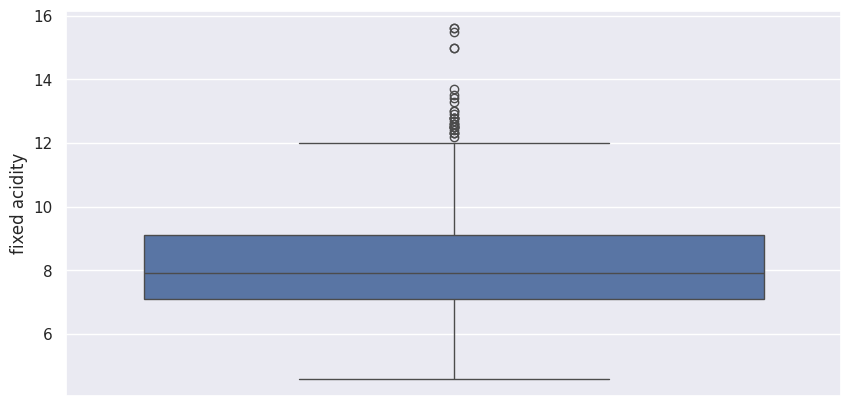

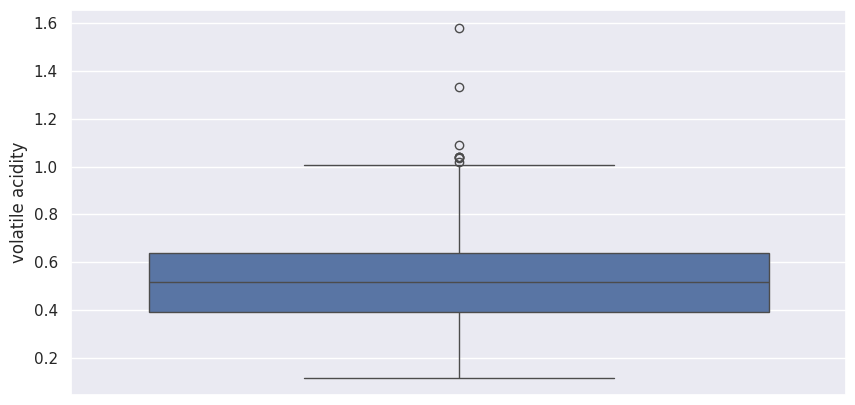

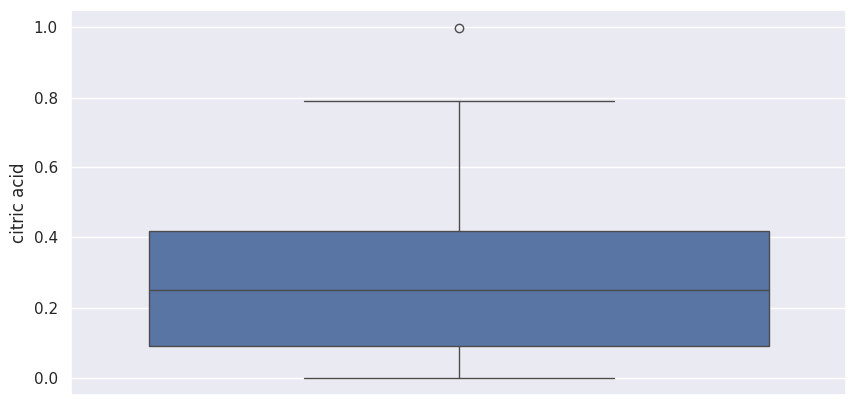

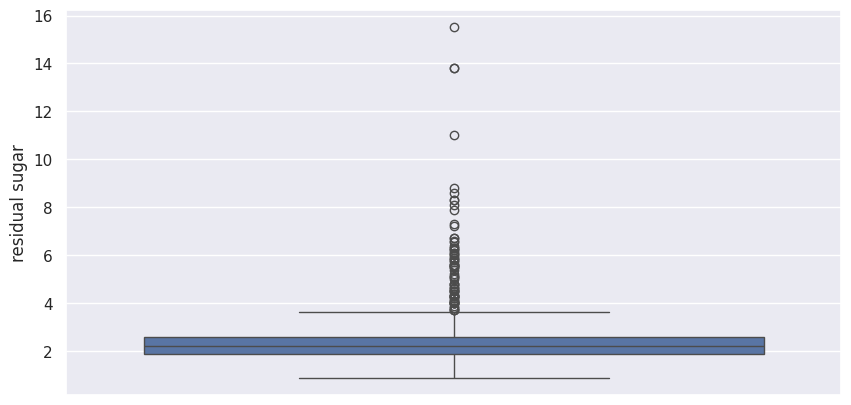

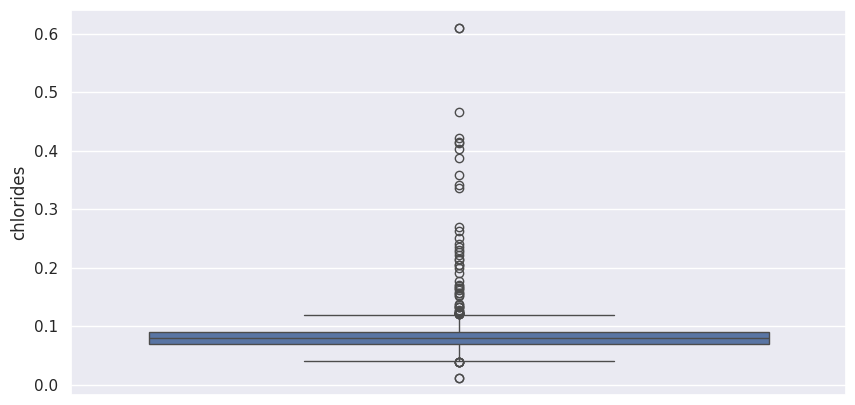

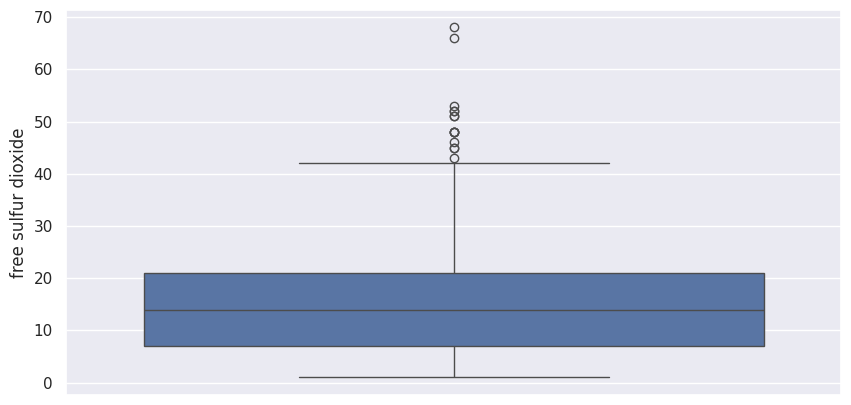

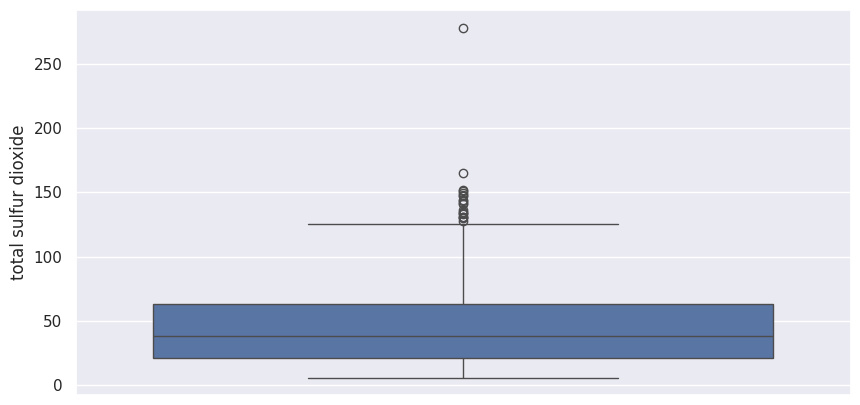

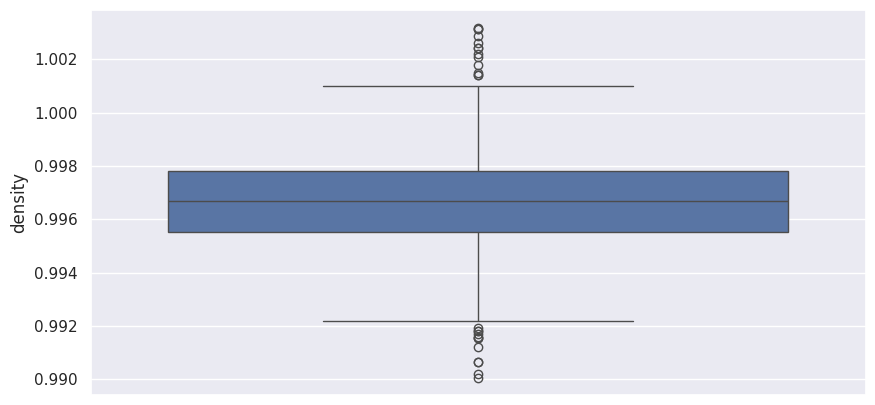

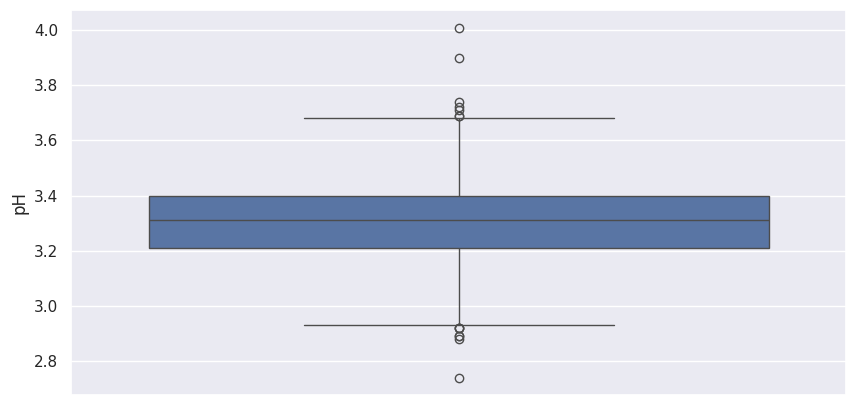

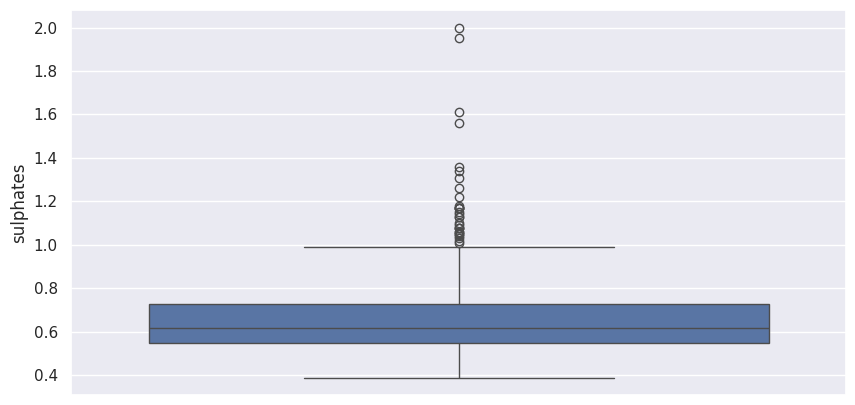

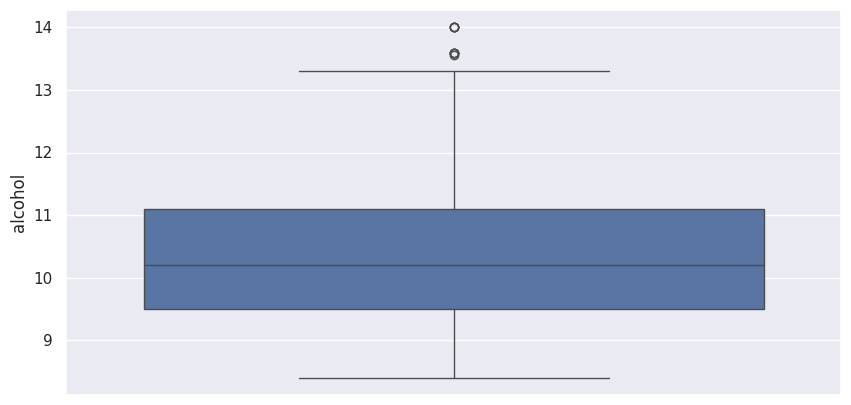

In [104]:
plt.subplots(figsize = (10, 5))
sns.boxplot(wine['fixed acidity'])
plt.annotate('Outlier', (wine['fixed acidity'].describe()['max'],0.1), xytext = (wine['fixed acidity'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['fixed acidity'].describe()['75%'] - wine['fixed acidity'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['volatile acidity'])
plt.annotate('Outlier', (wine['volatile acidity'].describe()['max'],0.1), xytext = (wine['volatile acidity'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['volatile acidity'].describe()['75%'] - wine['volatile acidity'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['citric acid'])
plt.annotate('Outlier', (wine['citric acid'].describe()['max'],0.1), xytext = (wine['citric acid'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['citric acid'].describe()['75%'] - wine['citric acid'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['residual sugar'])
plt.annotate('Outlier', (wine['residual sugar'].describe()['max'],0.1), xytext = (wine['residual sugar'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['residual sugar'].describe()['75%'] - wine['residual sugar'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['chlorides'])
plt.annotate('Outlier', (wine['chlorides'].describe()['max'],0.1), xytext = (wine['chlorides'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['chlorides'].describe()['75%'] - wine['chlorides'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['free sulfur dioxide'])
plt.annotate('Outlier', (wine['free sulfur dioxide'].describe()['max'],0.1), xytext = (wine['free sulfur dioxide'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['free sulfur dioxide'].describe()['75%'] - wine['free sulfur dioxide'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['total sulfur dioxide'])
plt.annotate('Outlier', (wine['total sulfur dioxide'].describe()['max'],0.1), xytext = (wine['total sulfur dioxide'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['total sulfur dioxide'].describe()['75%'] - wine['total sulfur dioxide'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['density'])
plt.annotate('Outlier', (wine['density'].describe()['max'],0.1), xytext = (wine['density'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['density'].describe()['75%'] - wine['density'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['pH'])
plt.annotate('Outlier', (wine['pH'].describe()['max'],0.1), xytext = (wine['pH'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['pH'].describe()['75%'] - wine['pH'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['sulphates'])
plt.annotate('Outlier', (wine['sulphates'].describe()['max'],0.1), xytext = (wine['sulphates'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['sulphates'].describe()['75%'] - wine['sulphates'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(wine['alcohol'])
plt.annotate('Outlier', (wine['alcohol'].describe()['max'],0.1), xytext = (wine['alcohol'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = wine['alcohol'].describe()['75%'] - wine['alcohol'].describe()['25%']


Berdasarkan plot box setelah penanganan outlier, variabel-variabel yang masih menunjukkan adanya outlier adalah: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, dan alcohol.

In [105]:
from scipy import stats
z = np.abs(stats.zscore(wine._get_numeric_data()))
#mendapatkan data yang tidak outlier pada semua variabel
wine1 = wine[(z<3).all(axis=1)]
wine1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


Dapat dilihat bahwa setelah dilakukan penanganan outlier, data wine menjadi sebanyak 776 data.

<Axes: ylabel='alcohol'>

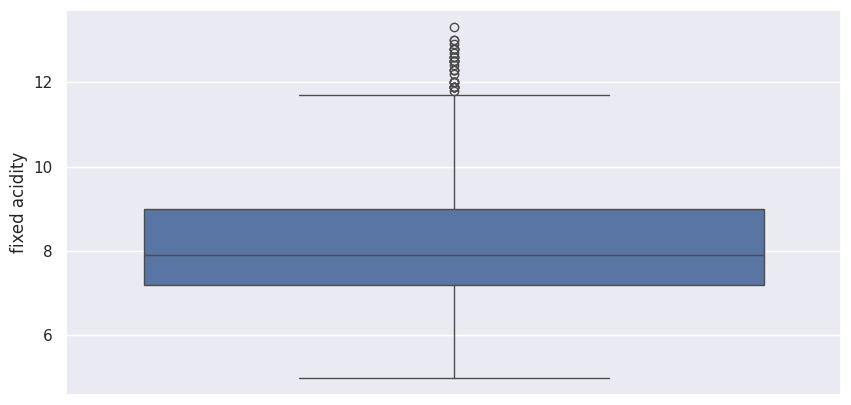

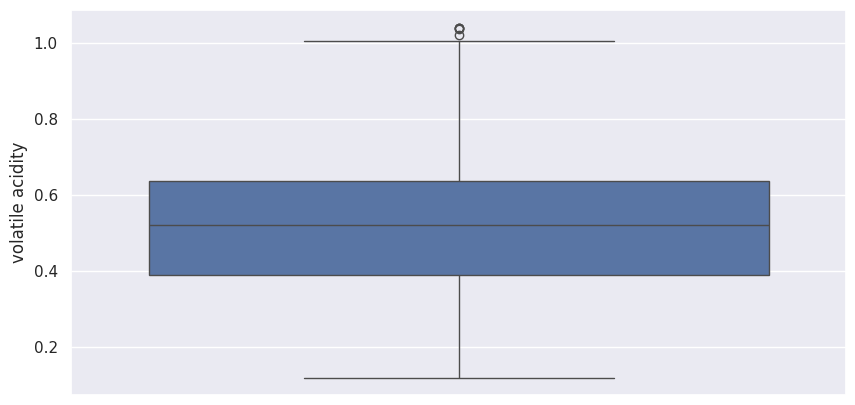

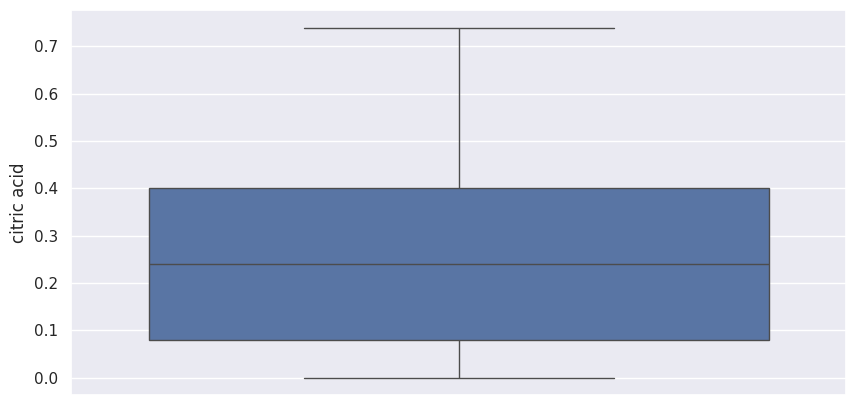

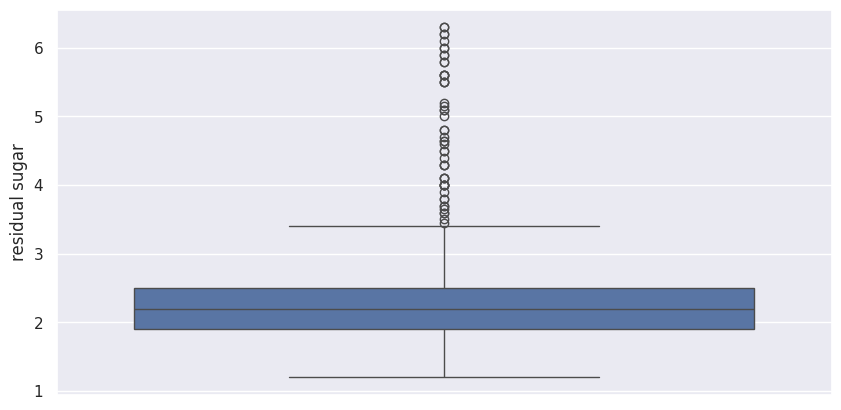

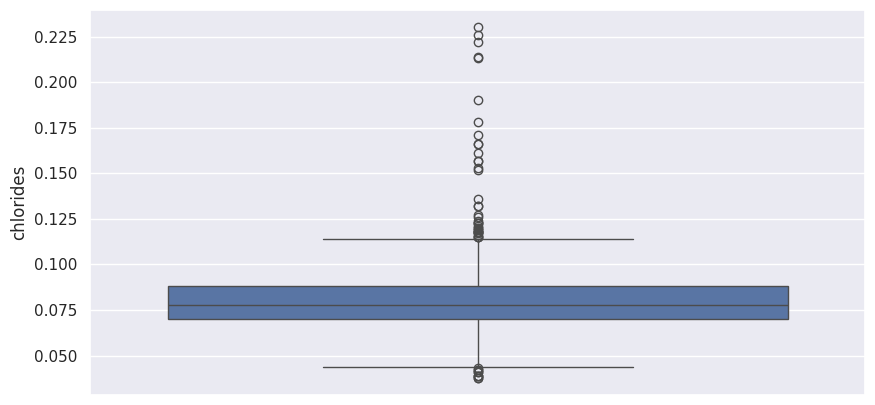

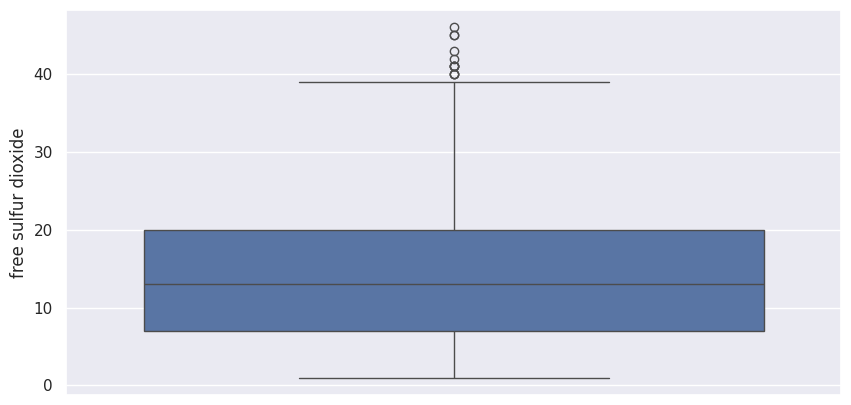

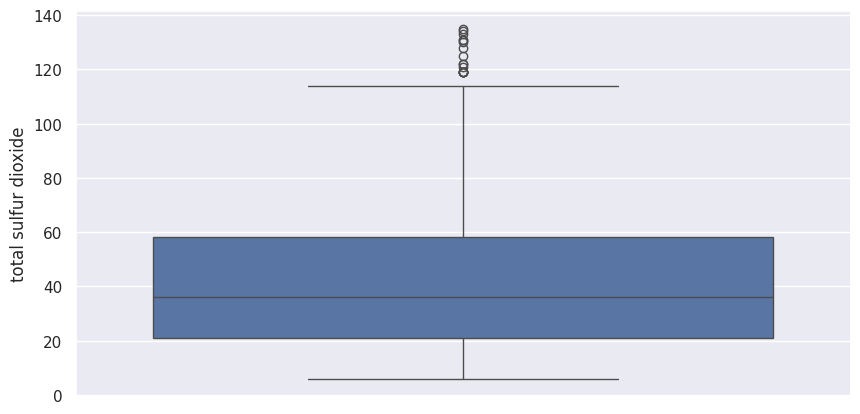

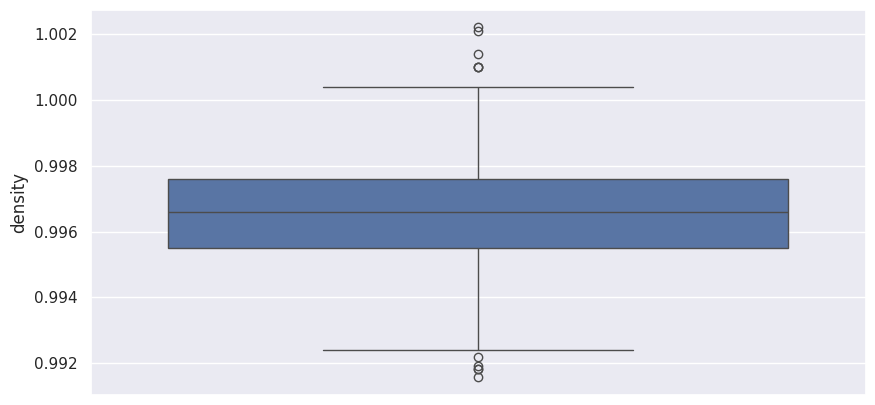

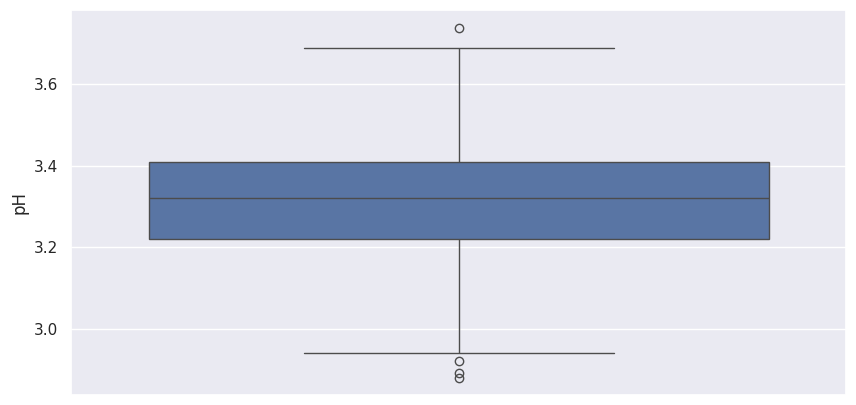

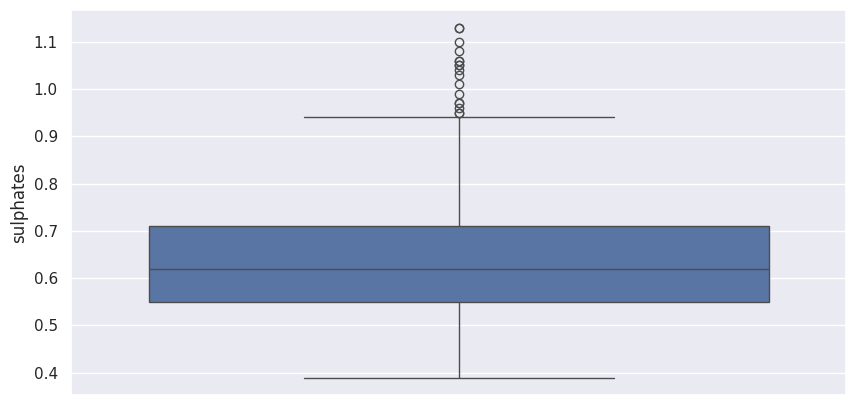

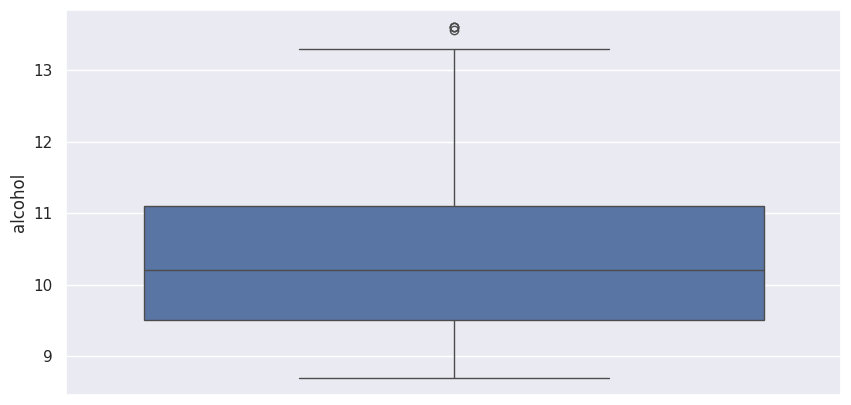

In [106]:
plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['fixed acidity'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['volatile acidity'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['citric acid'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['residual sugar'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['chlorides'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['free sulfur dioxide'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['total sulfur dioxide'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['density'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['pH'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['sulphates'])

plt.subplots(figsize = (10, 5))
sns.boxplot(wine1['alcohol'])


Setelah penanganan outlier, jumlah baris data dalam dataset wine berkurang dari 857 menjadi 776. Ini berarti 81 baris data yang teridentifikasi sebagai outlier telah dihapus. Meskipun demikian, setelah visualisasi ulang dengan box plot pada data yang sudah difilter (wine1), variabel-variabel berikut ini masih menunjukkan adanya outlier:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Hal ini menunjukkan bahwa bahkan setelah filter, masih ada nilai-nilai ekstrem yang berada di luar rentang IQR (Interquartile Range) dan dianggap sebagai outlier oleh box plot.


Imbalance

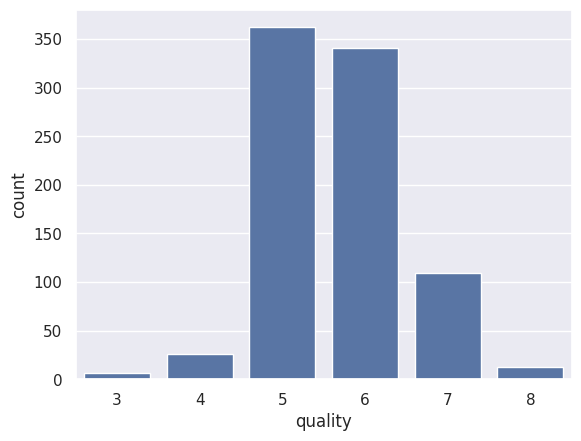

quality
5    0.422404
6    0.397900
7    0.127188
4    0.030338
8    0.015169
3    0.007001
Name: count, dtype: float64


In [107]:
# Mencari apakah dataset (kolom quality) imbalanced atau tidak
sns.countplot(x='quality',data=wine)
plt.show()
persentase = wine['quality'].value_counts()/wine.shape[0]
print(persentase)

Dari Dari hasil pengecekan, terlihat bahwa terdapat ketidakseimbangan (imbalance) antara kelas quality. Kelas 5 dan 6 mendominasi dengan proporsi 42.24% dan 39.79%. Sedangkan kelas 7 memiliki proporsi 12.71%, kelas 4 memiliki 3% proporsi, kelas 8 memiliki 1.51%, dan terakhir kelas 3 memiliki proporsi sebesar 0.7%. Hal ini menunjukkan bahwa dataset memiliki ketidakseimbangan kelas yang signifikan, yang dapat memengaruhi kinerja model dalam melakukan klasifikasi, khususnya untuk kelas minoritas.

Mencari fitur yang memungkinkan menjadi prediktor yang baik

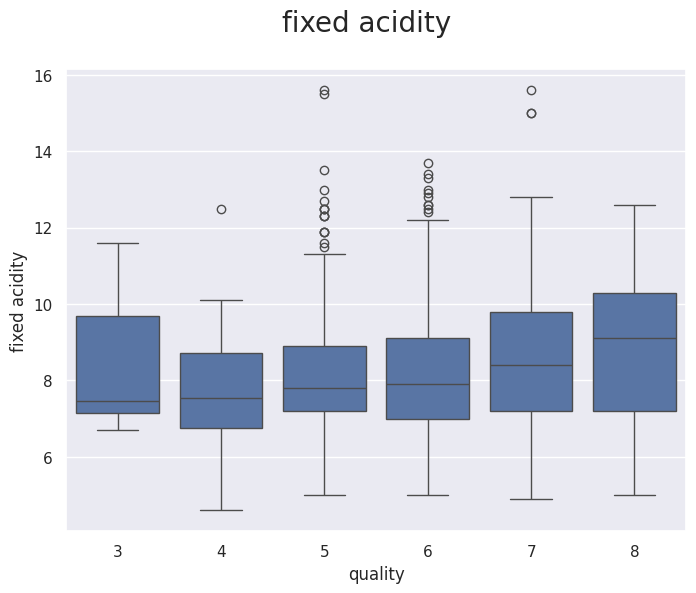

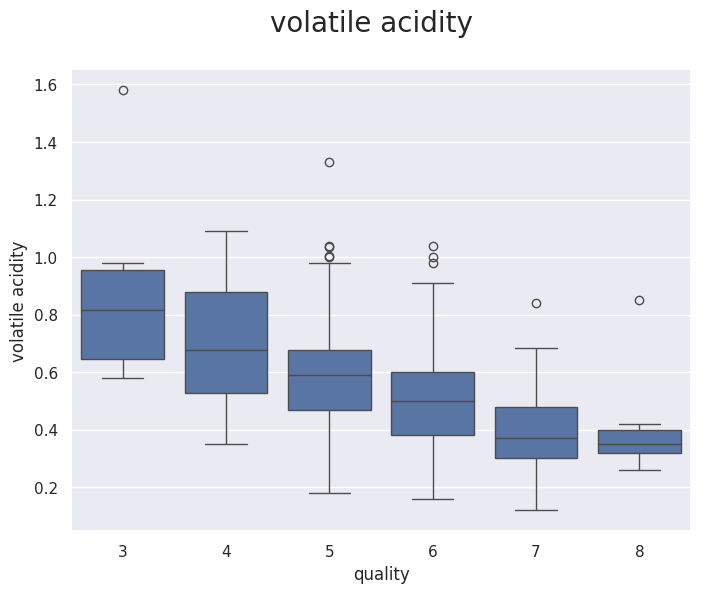

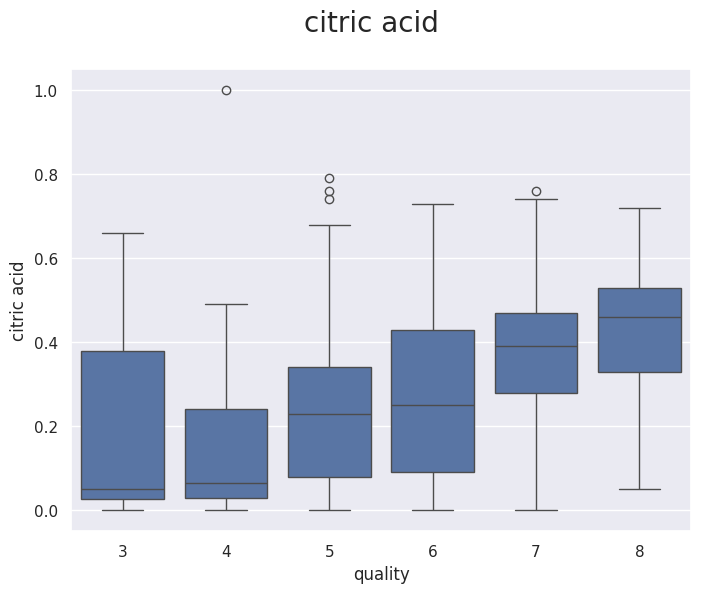

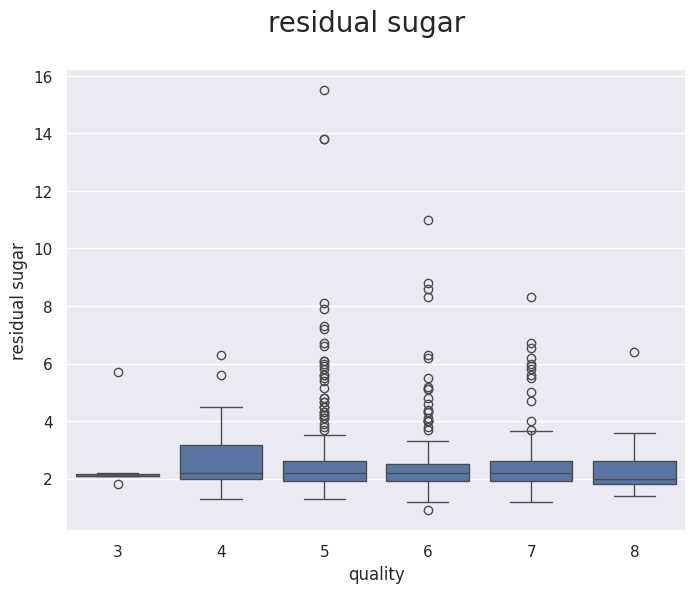

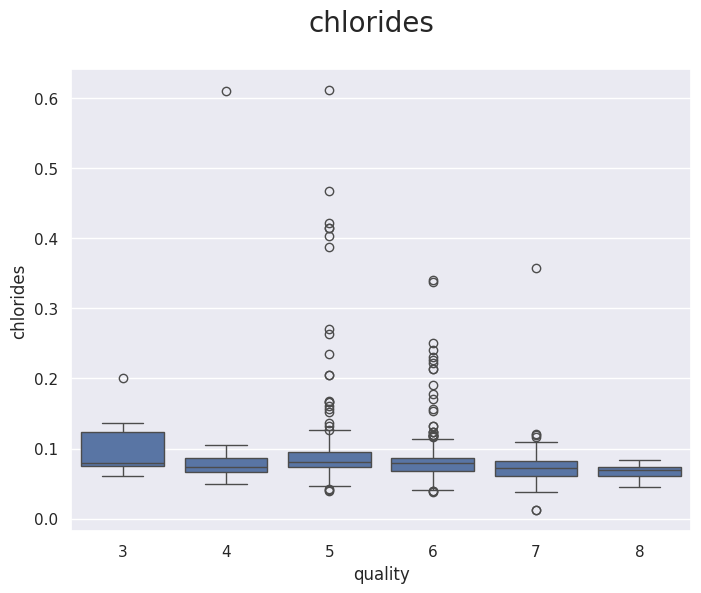

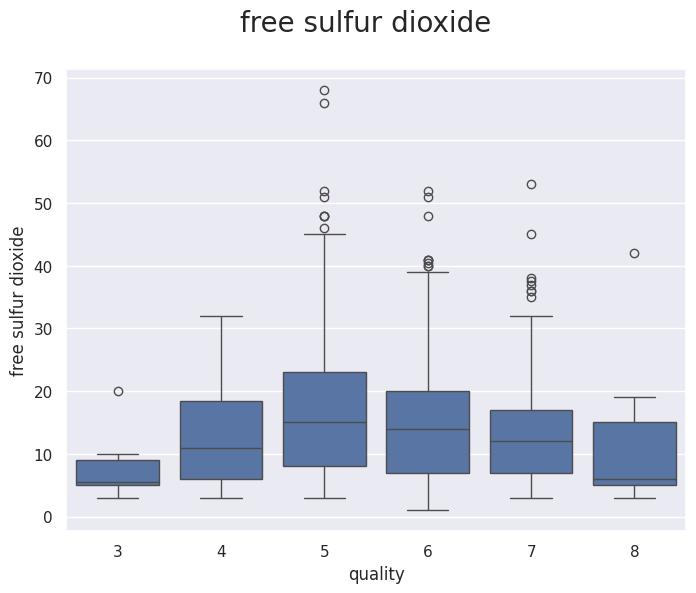

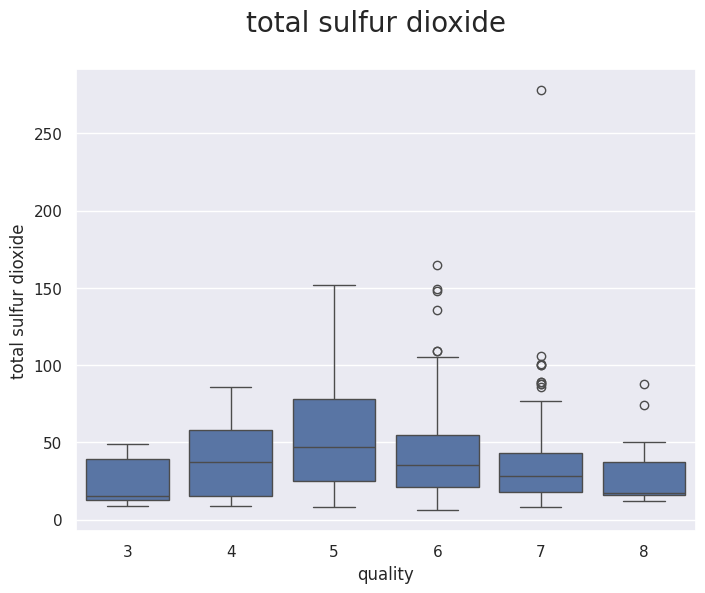

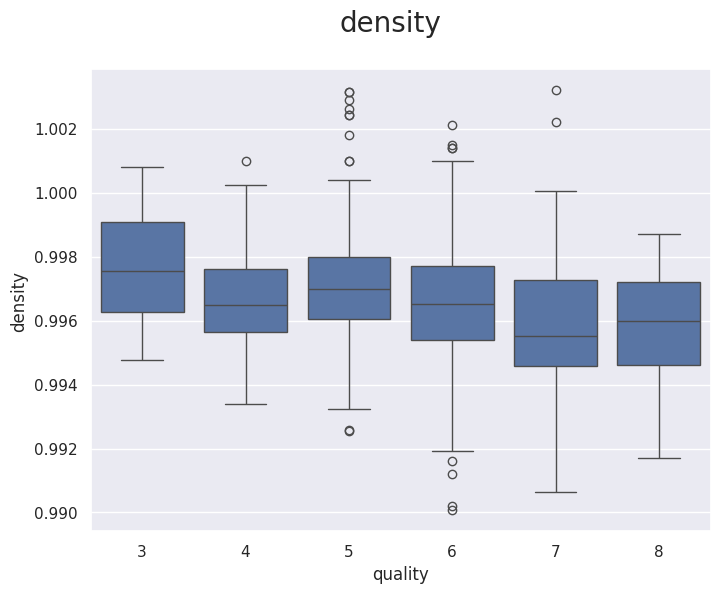

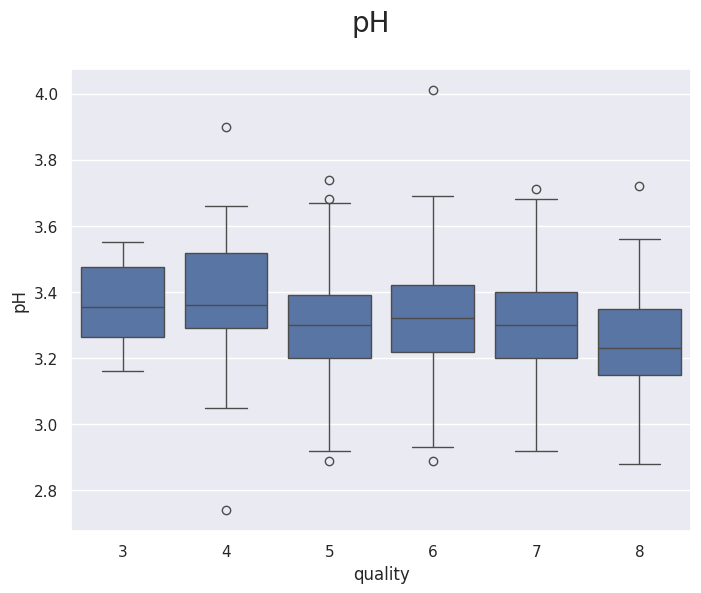

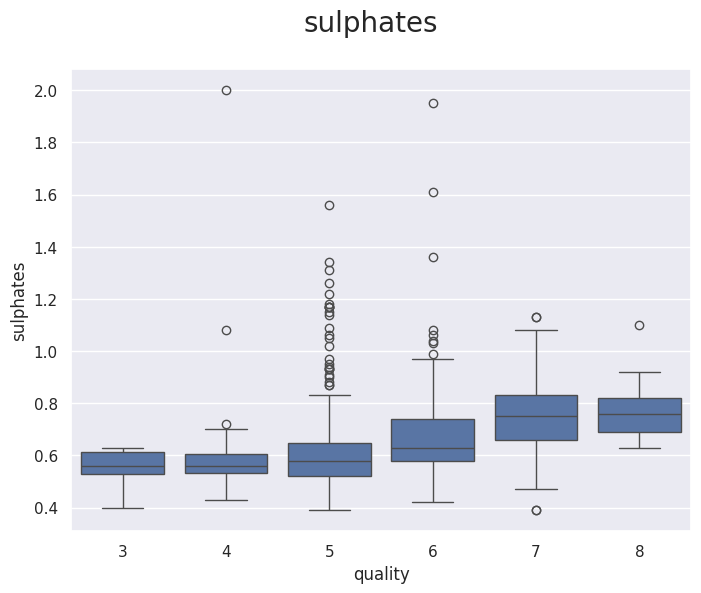

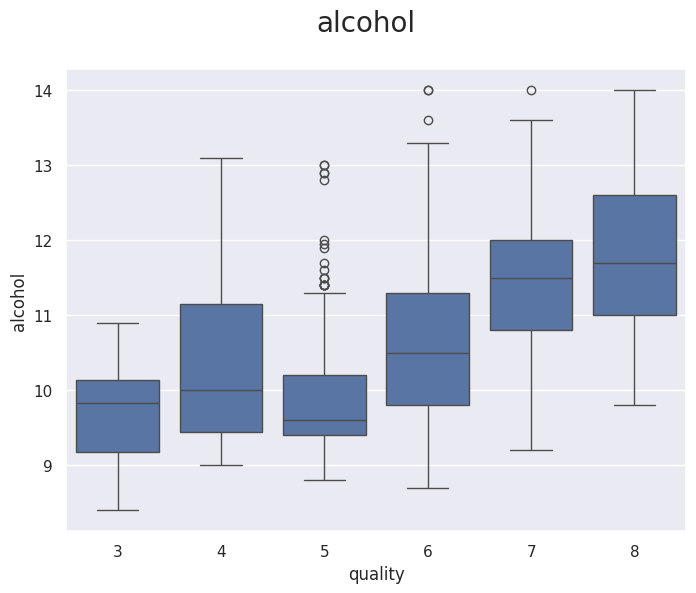

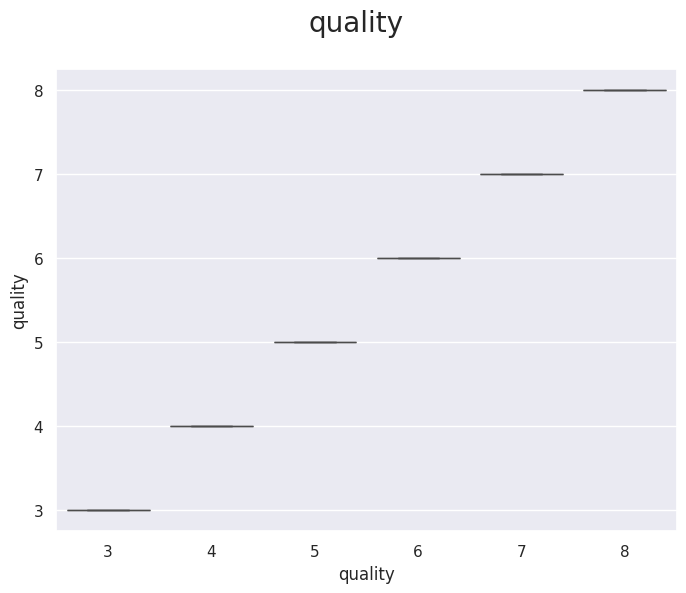

In [108]:
# Mencari fitur apa saja yang kemungkinan menjadi prediktor yang baik
import matplotlib.pyplot as plt
import seaborn as sns

# Iterasi untuk membuat box plot untuk setiap fitur numerik terhadap kolom 'quality'
for feature in wine.describe(exclude='object').columns[:-1]:
    plt.figure(figsize=(8, 6))
    plt.suptitle(feature, fontsize=20)
    sns.boxplot(data=wine, y=feature, x='quality')
    plt.show()

Berdasarkan box plot yang ditampilkan, beberapa fitur menunjukkan perbedaan distribusi yang cukup jelas di antara tingkat 'quality' yang berbeda, yang mengindikasikan bahwa fitur-fitur ini mungkin merupakan prediktor yang baik untuk kualitas anggur. Fitur-fitur tersebut antara lain:

1. volatile acidity: Terlihat ada kecenderungan kualitas anggur menurun seiring dengan peningkatan keasaman volatil.
2. citric acid: Kualitas anggur cenderung meningkat seiring dengan peningkatan asam sitrat.
3. sulphates: Tingkat sulfat yang lebih tinggi tampak berkorelasi dengan kualitas anggur yang lebih baik.
4. alcohol: Kualitas anggur umumnya meningkat dengan kandungan alkohol yang lebih tinggi.

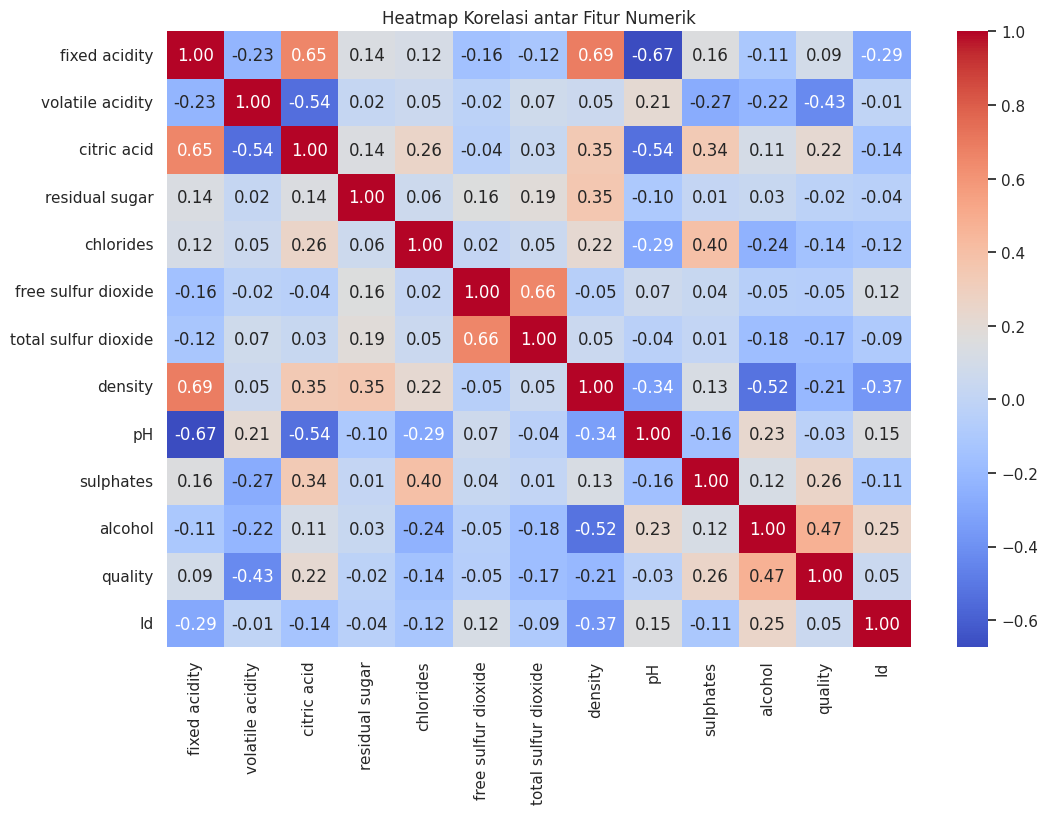

In [109]:

# Hitung matriks korelasi
correlation_matrix = wine.corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()

Dari matriks kolerasi tersebut dapat dilihat bahwa korelasi tertinggi terdapat antara variabel 'Quality' dan 'Alcohol' dengan nilai 0,47. Korelasi yang signifikan ini menunjukkan bahwa anggur dengan kandungan alkohol yang lebih tinggi cenderung memiliki kualitas yang lebih baik.

##Data Eksplorasi

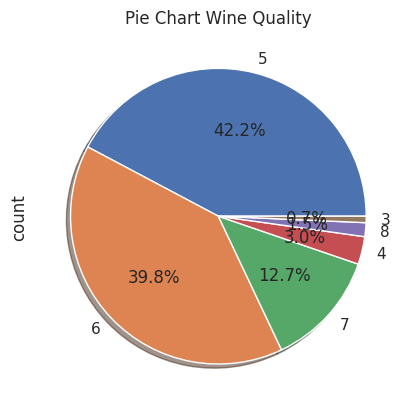

In [110]:
tipe = wine['quality'].value_counts()
tipe.plot.pie(autopct='%.1f%%', shadow=True)
plt.title('Pie Chart Wine Quality')
plt.show()

Dapat dilihat bahwa banyak sekali jenis wine yang termasuk ke dalam kelas 5 dan kelas 6 dengan presentase 42.2% dan 39.8%.

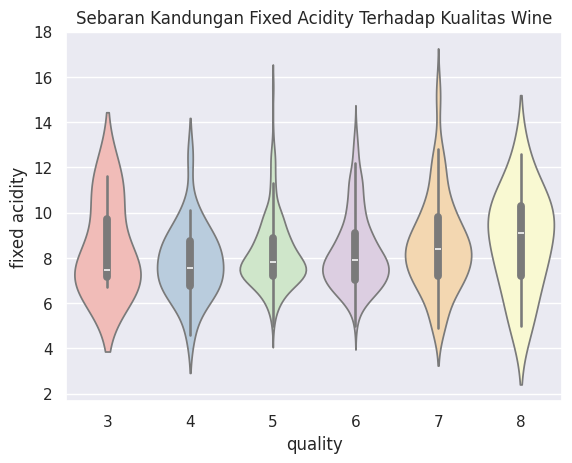

In [111]:
sns.set(style="darkgrid")
sns.violinplot(x='quality',y='fixed acidity',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan Fixed Acidity Terhadap Kualitas Wine')
plt.show()

Violin plot memperlihatkan distribusi nilai ‘fixed acidity’ pada setiap tingkat kualitas anggur. Dari visualisasi tersebut, terlihat bahwa variabel ‘fixed acidity’ tidak menunjukkan pola yang konsisten dalam membedakan kualitas anggur. Baik anggur dengan kualitas rendah maupun tinggi memiliki rentang keasaman yang hampir serupa. Dengan demikian, dapat disimpulkan bahwa ‘fixed acidity’ bukan merupakan faktor dominan dalam menentukan kualitas anggur, karena sebaran nilainya cenderung tumpang tindih di berbagai level kualitas.

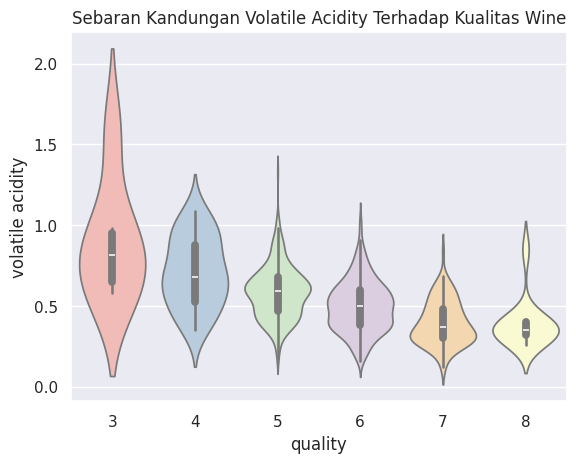

In [112]:
sns.set(style="darkgrid")
sns.violinplot(x='quality',y='volatile acidity',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan Volatile Acidity Terhadap Kualitas Wine')
plt.show()

Violin plot yang menampilkan distribusi nilai ‘volatile acidity’ untuk setiap tingkat kualitas anggur (3–8) menunjukkan tren yang cukup jelas: semakin tinggi kualitas anggur, semakin rendah kadar ‘volatile acidity’-nya. Anggur dengan kualitas rendah (3 dan 4) memiliki distribusi yang lebih lebar, median yang lebih tinggi, serta rentang nilai yang lebih bervariasi, sedangkan anggur dengan kualitas tinggi (7 dan 8) memiliki distribusi yang lebih sempit dengan median yang lebih rendah. Pola ini menunjukkan bahwa kadar keasaman mudah menguap yang rendah berkorelasi dengan kualitas anggur yang lebih baik, karena tingkat ‘volatile acidity’ yang tinggi sering kali menandakan adanya cacat atau penurunan mutu pada anggur.

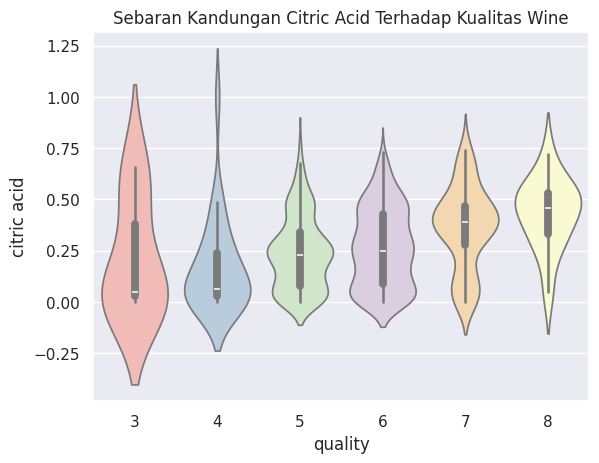

In [113]:
sns.set(style="darkgrid")
sns.violinplot(x='quality',y='citric acid',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan Citric Acid Terhadap Kualitas Wine')
plt.show()

Violin plot yang menampilkan distribusi nilai ‘citric acid’ untuk setiap tingkat kualitas anggur (3–8) memperlihatkan tren positif bahwa semakin tinggi kualitas anggur, semakin besar kandungan ‘citric acid’-nya. Anggur berkualitas rendah (3 dan 4) cenderung memiliki kadar asam sitrat yang sangat rendah, bahkan mendekati nol, sedangkan anggur dengan kualitas tinggi (7 dan 8) menunjukkan nilai ‘citric acid’ yang lebih tinggi dengan sebaran yang lebih luas. Median distribusi juga bergeser ke arah nilai yang lebih besar seiring peningkatan kualitas, menandakan adanya korelasi positif antara kadar asam sitrat dan mutu anggur. Meskipun terdapat variasi dalam setiap tingkat kualitas, pola umum ini menunjukkan bahwa ‘citric acid’ berperan penting dalam menentukan kualitas anggur karena asam sitrat berkontribusi terhadap rasa segar dan kompleksitas cita rasa anggur yang lebih baik.

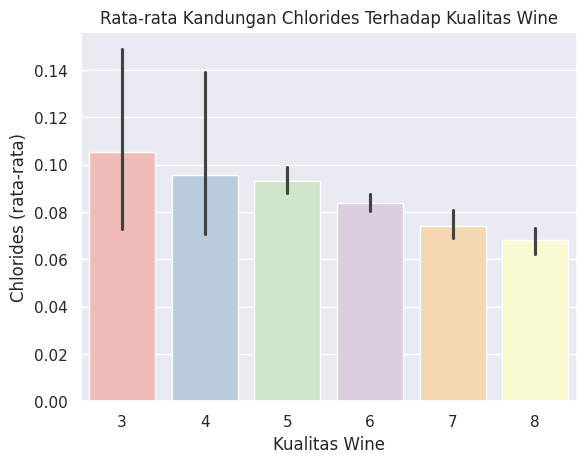

In [164]:
sns.set(style="darkgrid")
sns.barplot(x='quality',y='chlorides',data=wine,palette="Pastel1")
plt.title('Rata-rata Kandungan Chlorides Terhadap Kualitas Wine')
plt.xlabel('Kualitas Wine')
plt.ylabel('Chlorides (rata-rata)')
plt.show()

Grafik batang yang menampilkan rata-rata nilai ‘chlorides’ pada tiap tingkat kualitas anggur menunjukkan tren yang cukup jelas, yaitu semakin tinggi kualitas anggur, semakin rendah rata-rata kandungan kloridanya. Anggur dengan kualitas rendah (3 dan 4) memiliki nilai rata-rata ‘chlorides’ yang lebih tinggi, mengindikasikan bahwa konsentrasi garam yang besar cenderung berkaitan dengan mutu anggur yang rendah. Sebaliknya, anggur dengan kualitas tinggi (7 dan 8) menunjukkan kadar ‘chlorides’ yang lebih rendah, menandakan bahwa kandungan garam yang sedikit dapat berkontribusi terhadap kualitas yang lebih baik. Meskipun terdapat sedikit tumpang tindih pada error bar antar kategori kualitas, pola umum penurunan kandungan ‘chlorides’ seiring peningkatan kualitas tetap konsisten. Secara keseluruhan, hal ini menunjukkan bahwa ‘chlorides’ dapat dijadikan indikator yang cukup baik dalam memprediksi kualitas anggur.

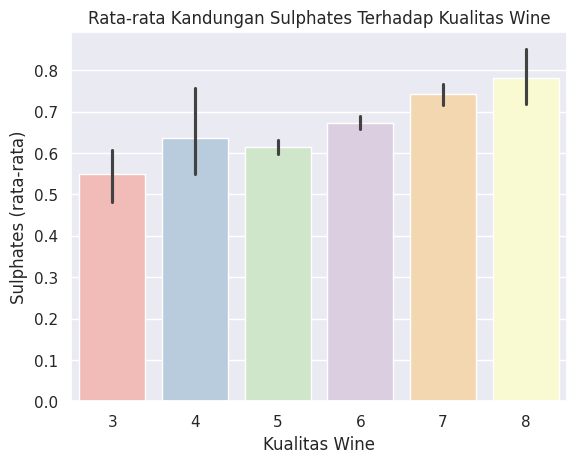

In [168]:
sns.set(style="darkgrid")
sns.barplot(x='quality', y='sulphates', data=wine, palette="Pastel1", hue='quality', legend=False)
plt.title('Rata-rata Kandungan Sulphates Terhadap Kualitas Wine')
plt.xlabel('Kualitas Wine')
plt.ylabel('Sulphates (rata-rata)')
plt.show()

Anggur dengan kualitas rendah (3 dan 4) memiliki kadar sulphates rata-rata yang lebih rendah dibandingkan dengan anggur berkualitas menengah hingga tinggi. Pada kualitas 5 hingga 7, kandungan sulphates cenderung meningkat secara signifikan, dengan kualitas 7 sering kali menunjukkan nilai tertinggi. Hal ini mengindikasikan bahwa kadar sulphates yang lebih optimal dapat berkontribusi terhadap cita rasa, kestabilan, dan daya tahan anggur. Sementara itu, anggur dengan kualitas 8 terkadang menunjukkan penurunan kecil pada kadar rata-rata sulphates, namun nilainya tetap lebih tinggi dibandingkan kualitas rendah. Secara keseluruhan, grafik ini mengindikasikan adanya korelasi positif antara kadar sulphates dan kualitas anggur, di mana kandungan sulphates yang seimbang berperan penting dalam menjaga kestabilan kimia serta meningkatkan kualitas sensori anggur.

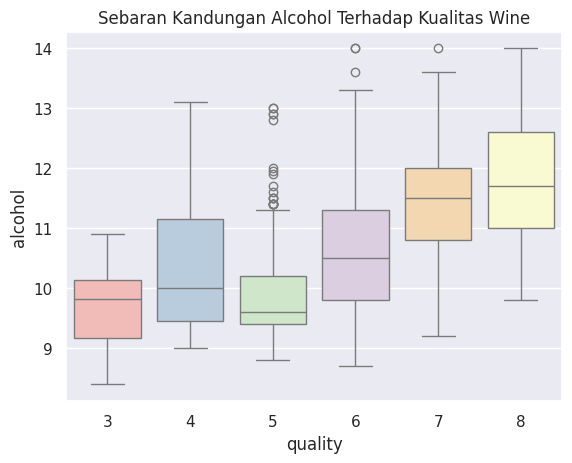

In [169]:
sns.set(style="darkgrid")
sns.boxplot(x='quality',y='alcohol',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan Alcohol Terhadap Kualitas Wine')
plt.show()

Semakin tinggi kadar alkohol dalam anggur, semakin baik pula kualitasnya. Pada anggur berkualitas rendah (misalnya 3 dan 4), distribusi alkohol cenderung terpusat pada nilai yang lebih rendah. Sebaliknya, anggur dengan kualitas tinggi (misalnya 7 dan 8) menunjukkan distribusi alkohol yang bergeser ke nilai yang lebih tinggi dan seringkali memiliki rentang yang lebih luas di segmen alkohol tinggi. Hal ini mengindikasikan bahwa kandungan alkohol adalah salah satu faktor kunci yang sangat berpengaruh terhadap penilaian kualitas anggur, di mana anggur dengan kadar alkohol yang lebih tinggi cenderung dinilai lebih baik.



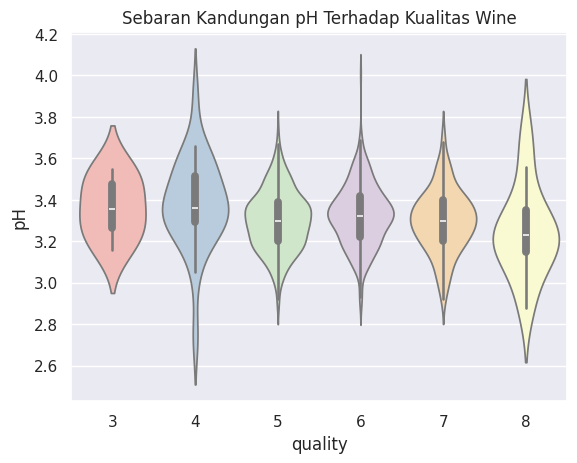

In [117]:
sns.set(style="darkgrid")
sns.violinplot(x='quality',y='pH',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan pH Terhadap Kualitas Wine')
plt.show()

pH bukan merupakan prediktor kuat untuk kualitas anggur. Tidak ada tren yang jelas bahwa pH secara signifikan meningkat atau menurun seiring peningkatan kualitas; distribusi pH cenderung tumpang tindih di seluruh tingkat kualitas, dengan rentang yang relatif stabil di sekitar nilai netral (sekitar 3.2 hingga 3.4) untuk sebagian besar kategori kualitas. Ini menunjukkan bahwa meskipun pH penting dalam kimia anggur, variasinya dalam dataset ini tidak cukup untuk membedakan kualitas secara langsung.

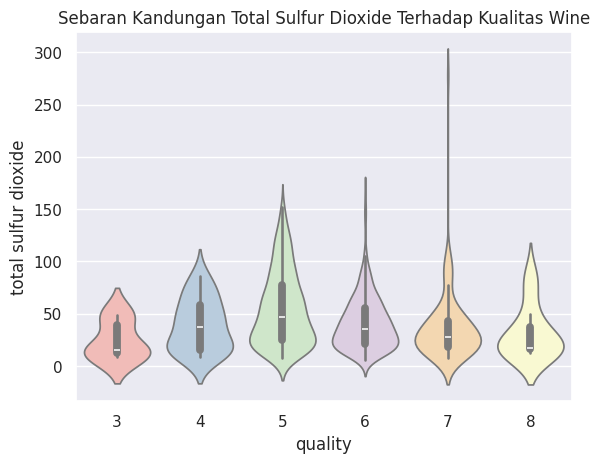

In [118]:
sns.set(style="darkgrid")
sns.violinplot(x='quality',y='total sulfur dioxide',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan Total Sulfur Dioxide Terhadap Kualitas Wine')
plt.show()

Terlihat bahwa 'total sulfur dioxide' tidak menunjukkan korelasi yang sangat jelas atau tren yang konsisten dengan peningkatan kualitas anggur. Distribusi 'total sulfur dioxide' untuk setiap tingkat kualitas (3 hingga 8) cenderung tumpang tindih secara signifikan. Meskipun ada sedikit variasi pada median dan bentuk 'biola' antar kualitas, perbedaan ini tidak cukup menonjol untuk menyimpulkan adanya hubungan linear atau pemisah yang kuat. Artinya, baik anggur berkualitas rendah maupun tinggi dapat memiliki rentang 'total sulfur dioxide' yang serupa, membuatnya kurang efektif sebagai prediktor utama kualitas anggur.

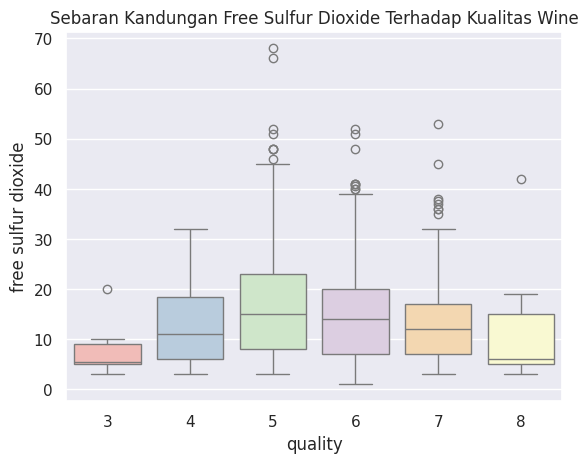

In [170]:
sns.set(style="darkgrid")
sns.boxplot(x='quality',y='free sulfur dioxide',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan Free Sulfur Dioxide Terhadap Kualitas Wine')
plt.show()

'free sulfur dioxide' tidak menunjukkan korelasi yang kuat atau tren linear yang jelas dengan peningkatan kualitas anggur. Distribusi 'free sulfur dioxide' untuk setiap tingkat kualitas cenderung saling tumpang tindih. Anggur dengan kualitas yang berbeda bisa memiliki rentang 'free sulfur dioxide' yang serupa. Meskipun ada sedikit variasi pada median atau kepadatan distribusi untuk beberapa kualitas, perbedaan ini tidak cukup signifikan untuk menjadikan 'free sulfur dioxide' sebagai prediktor utama kualitas anggur. Ini menunjukkan bahwa, seperti 'total sulfur dioxide', tingkat sulfur dioksida bebas sendirian mungkin tidak cukup untuk secara definitif membedakan antara anggur berkualitas rendah dan tinggi.

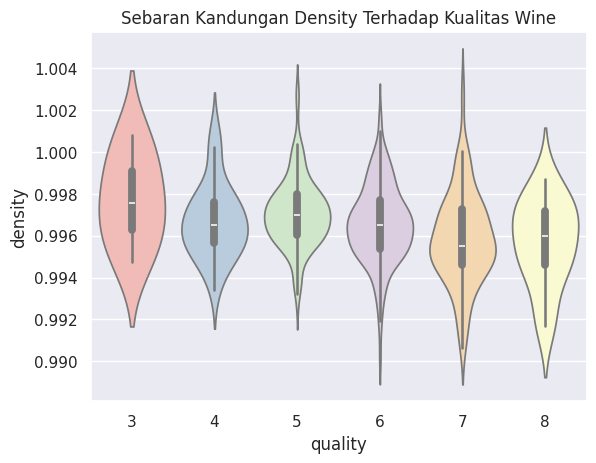

In [120]:
sns.set(style="darkgrid")
sns.violinplot(x='quality',y='density',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan Density Terhadap Kualitas Wine')
plt.show()

Terlihat bahwa 'density' tidak menunjukkan pola yang sangat kuat atau pemisah yang jelas antar kategori kualitas anggur. Distribusi kepadatan untuk setiap tingkat kualitas cenderung tumpang tindih secara signifikan. Meskipun mungkin ada sedikit pergeseran median atau perubahan bentuk 'biola' untuk kualitas tertentu, perbedaan tersebut tidak cukup menonjol untuk menyimpulkan adanya hubungan linear yang kuat atau menjadikannya prediktor utama kualitas. Artinya, anggur dengan kualitas rendah dan tinggi dapat memiliki nilai kepadatan yang serupa, menunjukkan bahwa 'density' sendirian mungkin tidak efektif dalam membedakan kualitas anggur secara langsung.

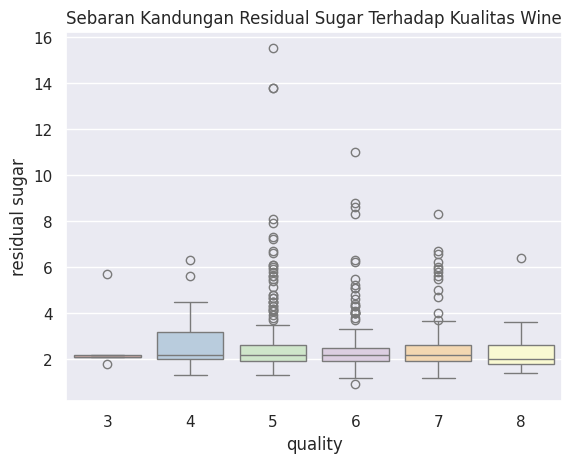

In [171]:
sns.set(style="darkgrid")
sns.boxplot(x='quality',y='residual sugar',data=wine,palette="Pastel1")
plt.title('Sebaran Kandungan Residual Sugar Terhadap Kualitas Wine')
plt.show()

'residual sugar' tidak menunjukkan pola yang sangat kuat atau tren linear yang jelas dengan peningkatan kualitas anggur. Distribusi gula sisa untuk setiap tingkat kualitas cenderung saling tumpang tindih secara signifikan. Anggur dengan kualitas yang berbeda bisa memiliki rentang 'residual sugar' yang serupa. Ini menunjukkan bahwa, tingkat gula sisa sendirian mungkin tidak cukup untuk secara definitif membedakan antara anggur berkualitas rendah dan tinggi.

##Modeling dan Evaluasi

Panggil library

In [122]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,average_precision_score,roc_auc_score
from sklearn.metrics import r2_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

# Import library Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Import library Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Import library Gaussian Naive Bayes
from sklearn import naive_bayes

# Import library XGBoost
from xgboost import XGBClassifier

# Import library Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import library Random Forest
from sklearn.ensemble import RandomForestClassifier

Lakukan drop pada kolom ID

In [123]:
wine = wine.drop('Id', axis=1)
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 80.5 KB
None


**Data Splitting**

Pada proses data splitting ini kita akan membagi dataset menjadi 2 bagian yaitu data untuk training dan data untuk testing. Pembagian data tersebut kita atur sebesar 80% data untuk data training dan 20% data untuk data testing.

In [124]:
X=wine.drop(columns=['quality'])
y_raw=wine['quality'] # Store original 'quality' in y_raw

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw) # Encode y_raw and store in y_encoded

In [126]:
#Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=0, stratify=y_encoded)

In [127]:
# Deskripsi singkat data training
print("Info Data Training:")
print(X_train.info())

# Deskripsi singkat data testing
print("Info Data Testing:")
print(X_test.info())

Info Data Training:
<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 390 to 713
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         685 non-null    float64
 1   volatile acidity      685 non-null    float64
 2   citric acid           685 non-null    float64
 3   residual sugar        685 non-null    float64
 4   chlorides             685 non-null    float64
 5   free sulfur dioxide   685 non-null    float64
 6   total sulfur dioxide  685 non-null    float64
 7   density               685 non-null    float64
 8   pH                    685 non-null    float64
 9   sulphates             685 non-null    float64
 10  alcohol               685 non-null    float64
dtypes: float64(11)
memory usage: 64.2 KB
None
Info Data Testing:
<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 653 to 664
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtyp

Dari deskripsi data training dan testing di atas, dapat dilihat bahwa:

1. Data training terdiri dari 685 entri, sedangkan data testing terdiri dari 172 entri.
2. Kedua dataset memiliki 11 kolom, dan keseluruhannya bertipe float.
3. Tidak ada nilai yang hilang (null) pada kedua dataset

**Modelling**

Akan dibuat model machine learning dengan beberapa metode yakni:
1. Logistik Regresi
2. Naive Bayes
3. Random Forest
4. XGBoost
5. Decision Tree

####Regresi Logistik

In [128]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)
Y_predlr = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test, Y_predlr)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predlr)
accuracy = accuracy_score(y_test,Y_predlr)
precision = precision_score(y_test, Y_predlr, average='weighted')
recall = recall_score(y_test, Y_predlr, average='weighted')
f1 = f1_score(y_test,Y_predlr, average='weighted')

logreg_probs= logreg.predict_proba(X_test)
PRscore = average_precision_score(y_test, logreg_probs, average='weighted') # Removed multi_class argument

logreg_auc = roc_auc_score(y_test, logreg_probs, multi_class='ovr', average='weighted')

print('Confusion matrix for Logistic Regression with 80% : 20% \n', cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)
print('PR-score_Logistic Regression : %.3f' %PRscore)
print('ROC-AUC-score_Logistic Regression : %.3f' %logreg_auc)


Confusion matrix for Logistic Regression with 80% : 20% 
 [[ 0  0  1  0  0  0]
 [ 0  0  3  2  0  0]
 [ 0  0 59 14  0  0]
 [ 0  0 25 39  4  0]
 [ 0  0  2 18  2  0]
 [ 0  0  0  2  1  0]]
accuracy_Logistic Regression : 0.581
precision_Logistic Regression : 0.520
recall_Logistic Regression: 0.581
f1-score_Logistic Regression : 0.541
PR-score_Logistic Regression : 0.599
ROC-AUC-score_Logistic Regression : 0.765


Dari hasil klasifikasi menggunakan regresi logistik diperoleh accuracy sebesar 58,1%, precision 52,0%, recall 58,1%, F1-score 54,1%, dan PR-score 59,9%. Nilai akurasi yang berada di kisaran 58% menunjukkan bahwa model belum mampu memprediksi kualitas anggur dengan tingkat ketepatan yang tinggi. Meskipun nilai ROC-AUC mencapai 0,765, yang menandakan kemampuan model dalam membedakan kelas cukup baik, nilai precision dan recall yang relatif rendah mengindikasikan bahwa performa model secara keseluruhan masih perlu ditingkatkan. Dengan demikian, klasifikasi menggunakan regresi logistik ini belum optimal dalam memprediksi kualitas anggur, meskipun memiliki potensi yang cukup baik dari sisi kemampuan diskriminatif menurut skor ROC-AUC.

####Naive Bayes

In [129]:
gaussian = naive_bayes.GaussianNB()
gaussian.fit(X_train, y_train)
Y_predgnb = gaussian.predict(X_test)
accuracy_gnb=round(accuracy_score(y_test, Y_predgnb)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) *100, 2)

cm = confusion_matrix(y_test, Y_predgnb)
accuracy = accuracy_score(y_test,Y_predgnb)
precision = precision_score(y_test, Y_predgnb, average='weighted')
recall = recall_score(y_test, Y_predgnb, average='weighted')
f1 = f1_score(y_test,Y_predgnb, average='weighted')

gnb_probs = gaussian.predict_proba(X_test)
PRscore = average_precision_score(y_test, gnb_probs, average='weighted')

gnb_auc = roc_auc_score(y_test, gnb_probs, multi_class='ovr', average='weighted')

print('Confusion matrix for Naive Bayes with 80% : 20% \n', cm)
print('accuracy_Naive Bayes : %.3f' %accuracy)
print('precision_Naive Bayes : %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)
print('PR-score_Naive Bayes : %.3f' %PRscore)
print('ROC-AUC-score_Naive Bayes : %.3f' %gnb_auc)

Confusion matrix for Naive Bayes with 80% : 20% 
 [[ 0  0  0  1  0  0]
 [ 1  0  1  2  1  0]
 [ 3  0 27 42  1  0]
 [ 0  1 16 46  5  0]
 [ 0  0  5  8  7  2]
 [ 0  0  0  1  2  0]]
accuracy_Naive Bayes : 0.465
precision_Naive Bayes : 0.472
recall_Naive Bayes: 0.465
f1-score_Naive Bayes : 0.451
PR-score_Naive Bayes : 0.540
ROC-AUC-score_Naive Bayes : 0.706


Dari hasil klasifikasi menggunakan algoritma Naive Bayes, diperoleh accuracy sebesar 46,5%, precision 47,2%, recall 46,5%, F1-score 45,1%, dan PR-score 54,0%. Nilai akurasi yang cukup rendah menunjukkan bahwa model ini belum mampu memprediksi kualitas anggur dengan baik. Meskipun demikian, nilai ROC-AUC sebesar 0,706 menandakan bahwa model masih memiliki kemampuan moderat dalam membedakan kelas antar kategori kualitas. Secara keseluruhan, performa model Naive Bayes dalam klasifikasi kualitas anggur tergolong kurang optimal dan perlu perbaikan, baik melalui penyesuaian parameter maupun peningkatan kualitas data pelatihan.

####Random Forest

In [130]:
# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_predrf = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_predrf)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predrf)
accuracy = accuracy_score(y_test,Y_predrf)
precision = precision_score(y_test, Y_predrf, average='weighted') # Added average='weighted'
recall = recall_score(y_test, Y_predrf, average='weighted')      # Added average='weighted'
f1 = f1_score(y_test,Y_predrf, average='weighted')                # Added average='weighted'

rf_probs= random_forest.predict_proba(X_test)
PRscore = average_precision_score(y_test, rf_probs, average='weighted') # Changed Y_predrf to rf_probs and added average='weighted'

rf_auc = roc_auc_score(y_test, rf_probs, multi_class='ovr', average='weighted') # Added multi_class and average for multiclass ROC AUC

print('Confusion matrix for Random Forest with 80% : 20%\n', cm)
print('accuracy_random_Forest : %.3f' % accuracy)
print('precision_random_Forest : %.3f' % precision)
print('recall_random_Forest : %.3f' % recall)
print('f1-score_random_Forest : %.3f' % f1)
print('PR-score_random_Forest : %.3f' %PRscore)
print('ROC-AUC-score_random_Forest : %.3f' %rf_auc)

Confusion matrix for Random Forest with 80% : 20%
 [[ 0  0  1  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0 53 19  1  0]
 [ 0  0 14 49  5  0]
 [ 0  0  0 11 11  0]
 [ 0  0  0  0  2  1]]
accuracy_random_Forest : 0.663
precision_random_Forest : 0.646
recall_random_Forest : 0.663
f1-score_random_Forest : 0.649
PR-score_random_Forest : 0.692
ROC-AUC-score_random_Forest : 0.814


Dari hasil klasifikasi menggunakan algoritma Random Forest, diperoleh accuracy sebesar 66,3%, precision 64,6%, recall 66,3%, F1-score 64,9%, dan PR-score 69,2%. Nilai-nilai ini menunjukkan bahwa model Random Forest memiliki kinerja yang cukup baik dalam memprediksi kualitas anggur dibandingkan dengan model sebelumnya. Selain itu, ROC-AUC sebesar 0,814 mengindikasikan kemampuan model yang baik dalam membedakan antar kelas kualitas anggur. Secara keseluruhan, Random Forest terbukti memberikan performa yang lebih stabil dan akurat, menjadikannya model yang lebih andal untuk klasifikasi kualitas anggur pada data ini.

####XGBoost

In [172]:
# XGBoost Classifier
print('Evaluating XGBoost Classifier...')
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train, y_train)
Y_pred_xgb = xgboost_model.predict(X_test)

acc_xgb = round(xgboost_model.score(X_train, y_train) * 100, 2)
accuracy_xgb = round(accuracy_score(y_test, Y_pred_xgb) * 100, 2) # Multiplied by 100 and rounded
cm_xgb = confusion_matrix(y_test, Y_pred_xgb)
precision_xgb = precision_score(y_test, Y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, Y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, Y_pred_xgb, average='weighted')

xgb_probs = xgboost_model.predict_proba(X_test)
PRscore_xgb = average_precision_score(y_test, xgb_probs, average='weighted')
roc_auc_xgb = roc_auc_score(y_test, xgb_probs, multi_class='ovr', average='weighted')

print('Confusion matrix for XGBoost with 80% : 20%\n', cm_xgb)
print('accuracy_XGBoost : %.3f' % accuracy_xgb)
print('precision_XGBoost : %.3f' % precision_xgb)
print('recall_XGBoost : %.3f' % recall_xgb)
print('f1-score_XGBoost : %.3f' % f1_xgb)
print('PR-score_XGBoost : %.3f' % PRscore_xgb)
print('ROC-AUC-score_XGBoost : %.3f' % roc_auc_xgb)


Evaluating XGBoost Classifier...
Confusion matrix for XGBoost with 80% : 20%
 [[ 0  0  1  0  0  0]
 [ 0  0  4  0  1  0]
 [ 1  0 55 16  1  0]
 [ 0  0 19 40  8  1]
 [ 0  0  0  9 12  1]
 [ 0  0  0  0  2  1]]
accuracy_XGBoost : 62.790
precision_XGBoost : 0.609
recall_XGBoost : 0.628
f1-score_XGBoost : 0.617
PR-score_XGBoost : 0.646
ROC-AUC-score_XGBoost : 0.792


Dari hasil klasifikasi menggunakan algoritma XGBoost, diperoleh accuracy sebesar 62,79%, precision 60,9%, recall 62,8%, F1-score 61,7%, dan PR-score 64,6%. Nilai-nilai tersebut menunjukkan bahwa XGBoost mampu memberikan performa yang cukup baik dan seimbang antara precision serta recall. Selain itu, ROC-AUC sebesar 0,792 menandakan bahwa model memiliki kemampuan yang baik dalam membedakan antar kelas kualitas anggur. Dengan demikian, XGBoost dapat dikategorikan sebagai model dengan performa yang solid, meskipun masih sedikit di bawah Random Forest dalam hal akurasi dan stabilitas hasil prediksi.

####Decision Tree

In [132]:
import warnings
warnings.filterwarnings('ignore') # Filter warnings to avoid cluttering output

# Decision Tree Classifier
print('\nEvaluating Decision Tree Classifier...')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)

acc_dt = round(decision_tree.score(X_train, y_train) * 100, 2)
# Corrected calculation for accuracy_dt to be consistent with others (percentage and rounded)
accuracy_dt = round(accuracy_score(y_test, Y_pred_dt) * 100, 2)
cm_dt = confusion_matrix(y_test, Y_pred_dt)
precision_dt = precision_score(y_test, Y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, Y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, Y_pred_dt, average='weighted')

dt_probs = decision_tree.predict_proba(X_test)
PRscore_dt = average_precision_score(y_test, dt_probs, average='weighted')
roc_auc_dt = roc_auc_score(y_test, dt_probs, multi_class='ovr', average='weighted')

print('Confusion matrix for Decision Tree with 80% : 20%\n', cm_dt)
print('accuracy_Decision Tree : %.3f' % accuracy_dt)
print('precision_Decision Tree : %.3f' % precision_dt)
print('recall_Decision Tree : %.3f' % recall_dt)
print('f1-score_Decision Tree : %.3f' % f1_dt)
print('PR-score_Decision Tree : %.3f' % PRscore_dt)
print('ROC-AUC-score_Decision Tree : %.3f' % roc_auc_dt)


Evaluating Decision Tree Classifier...
Confusion matrix for Decision Tree with 80% : 20%
 [[ 0  1  0  0  0  0]
 [ 0  1  2  1  1  0]
 [ 1  3 49 19  1  0]
 [ 0  0 22 34  9  3]
 [ 0  1  1  6 14  0]
 [ 0  0  0  0  2  1]]
accuracy_Decision Tree : 57.560
precision_Decision Tree : 0.581
recall_Decision Tree : 0.576
f1-score_Decision Tree : 0.576
PR-score_Decision Tree : 0.490
ROC-AUC-score_Decision Tree : 0.679


Dari hasil klasifikasi menggunakan algoritma Decision Tree, diperoleh accuracy sebesar 57,56%, precision 58,1%, recall 57,6%, F1-score 57,6%, dan PR-score 49,0%. Nilai-nilai ini menunjukkan bahwa model memiliki performa yang cukup seimbang antara precision dan recall, namun secara keseluruhan masih tergolong moderat dalam memprediksi kualitas anggur. Sementara itu, ROC-AUC sebesar 0,679 menunjukkan kemampuan model yang masih terbatas dalam membedakan antar kelas. Dengan demikian, meskipun Decision Tree mampu menangkap pola dasar dalam data, hasilnya belum sebaik model ensemble seperti Random Forest atau XGBoost.

In [133]:
result = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Decision Tree'],
    'Score': [acc_log, acc_gaussian, acc_random_forest, acc_xgb, acc_dt],
    'Accuracy': [accuracy_lr, accuracy_gnb, accuracy_rf, accuracy_xgb, accuracy_dt],
    })
result_df = result.sort_values(by='Accuracy', ascending=False) # Corrected 'results' to 'result' and 'Accuracy_score' to 'Accuracy'
result_df_20 = result_df.reset_index(drop=True)
result_df_20.head(9)

,Model,Score,Accuracy
0,Random Forest,100.00,66.28
1,XGBoost,100.00,62.79
2,Logistic Regression,61.02,58.14
3,Decision Tree,100.00,57.56
4,Naive Bayes,52.70,46.51


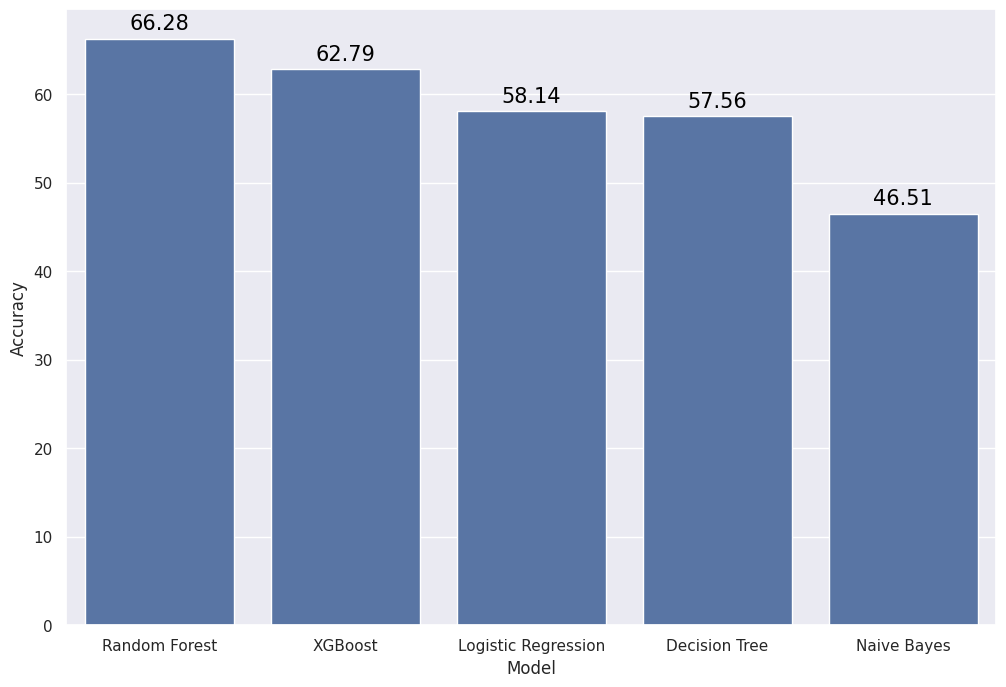

In [134]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy",data=result_df_20)
labels = (result_df["Accuracy"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

Hasil akurasi terbaik dari visualisasi menggunakan bar chart yaitu klasifikasi Random Forest mendapatkan nilai akurasi yang paling optimum yaitu sebesar 66.28%. Sehingga klasifikasi Random Forest merupakan klasifikasi terbaik dari segi akurasi untuk partisi 80% : 20%.

Text(0.5, 19.049999999999997, 'Predicted label')

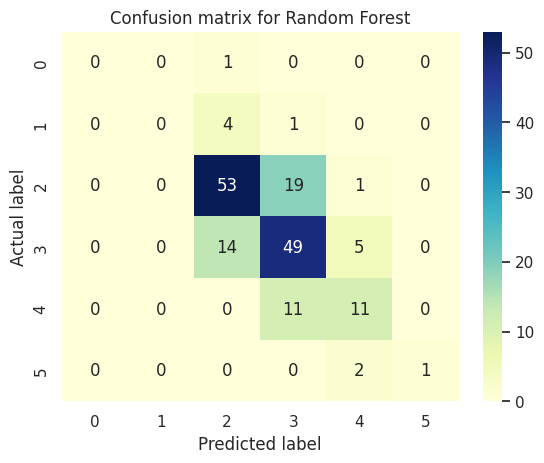

In [135]:
from sklearn import metrics
cm = confusion_matrix(y_test, random_forest.predict(X_test))
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title("Confusion matrix for Random Forest")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [136]:
pip install imbalanced-learn

In [137]:
model = [logreg, gaussian, random_forest, xgboost_model, decision_tree]
algo = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Decision Tree']

##Benchmarking : Data Testing

Benchmarking model pada data testing dilakukan untuk menilai performa berbagai model yang telah dilatih menggunakan data training. Proses evaluasi ini menggunakan data yang belum pernah dipelajari oleh model sebelumnya untuk memastikan kemampuan generalisasi model terhadap data baru.

Tiga metrik utama digunakan dalam evaluasi ini, yaitu **ROC AUC Score**, **Recall Score**, dan **False Positive Rate (FPR)**.

* **ROC AUC Score** menggambarkan kemampuan model dalam membedakan antara kelas positif dan negatif, dengan nilai yang semakin mendekati 1 menunjukkan performa yang semakin baik.
* **Recall Score** atau *True Positive Rate* mengukur sejauh mana model mampu mengenali kelas positif dengan benar; semakin tinggi nilainya, semakin baik kemampuan model mendeteksi kasus positif.
* **FPR (False Positive Rate)** menunjukkan frekuensi kesalahan model dalam mengklasifikasikan kelas negatif sebagai positif; semakin rendah nilainya, semakin baik performa model.

Dengan membandingkan ketiga metrik tersebut di antara seluruh model, dapat diidentifikasi model yang paling efektif dalam memprediksi kelas target pada data testing yang belum pernah dilihat sebelumnya.


In [138]:
from sklearn.pipeline import Pipeline

print("Pipeline class imported successfully from sklearn.pipeline.")

Pipeline class imported successfully from sklearn.pipeline.


In [139]:
roc_auc = []
recall = []
confus_matrix = []
fpr = []

for i, a in enumerate(model):
    pipeline_model = Pipeline([('model', a)])

    pipeline_model.fit(X_train, y_train)

    y_pred = pipeline_model.predict(X_test)
    y_pred_proba = pipeline_model.predict_proba(X_test)
    confmat_var = confusion_matrix(y_test, y_pred)

    roc_auc.append(roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')) # Added multi_class and average
    recall.append(recall_score(y_test, y_pred, average='weighted')) # Added average='weighted'
    confus_matrix.append(confmat_var)

    # The calculation for FPR needs to be adapted for multiclass, but for now we'll keep the existing calculation
    # It currently calculates a specific rate for class 0 incorrectly if there are more than 2 classes
    fpr.append(confmat_var[0][1]/(confmat_var[0][1]+confmat_var[0][0]))

    print(a,'\n', classification_report(y_test,y_pred))

pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc,
                   'Recall Score': recall,
                   'FPR': fpr,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression(max_iter=1000) 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.66      0.81      0.72        73
           3       0.52      0.57      0.55        68
           4       0.29      0.09      0.14        22
           5       0.00      0.00      0.00         3

    accuracy                           0.58       172
   macro avg       0.24      0.25      0.23       172
weighted avg       0.52      0.58      0.54       172

GaussianNB() 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.55      0.37      0.44        73
           3       0.46      0.68      0.55        68
           4       0.44      0.32      0.37        22
           5       0.00      0.00      0.00         3

    accuracy              

,ROC AUC Score,Recall Score,FPR
Model,,,
Random Forest,0.808274,0.645349,NaN
XGBoost,0.791525,0.627907,NaN
Logistic Regression,0.765373,0.581395,NaN
Naive Bayes,0.706032,0.465116,NaN
Decision Tree,0.684869,0.563953,NaN


Hasil benchmarking model pada data testing menunjukkan bahwa Random Forest memiliki ROC AUC Score tertinggi, yaitu sekitar 0.808, yang menunjukkan bahwa model ini memiliki kemampuan paling baik dalam membedakan antara kelas kualitas tinggi dan rendah pada data anggur. Selain itu, nilai recall score dari Random Forest sebesar 0.645 menandakan bahwa model ini cukup mampu mengenali sebagian besar sampel dengan kualitas positif, meskipun masih ada sejumlah sampel yang tidak terdeteksi dengan benar.

Model XGBoost menempati posisi kedua dengan ROC AUC Score sebesar 0.792 dan recall score 0.628, menunjukkan performa yang cukup baik namun sedikit lebih rendah dibandingkan Random Forest. Logistic Regression memiliki performa menengah dengan ROC AUC Score 0.765 dan recall score 0.581, menunjukkan kecenderungan model ini untuk melewatkan lebih banyak observasi positif.

Sementara itu, Naive Bayes dan Decision Tree menunjukkan performa yang relatif lebih rendah dengan ROC AUC Score masing-masing 0.706 dan 0.665, serta recall score 0.465 dan 0.552. Nilai tersebut menandakan bahwa kedua model ini kurang optimal dalam mengenali sampel dengan kualitas tinggi.

Dengan demikian, berdasarkan hasil pengujian ini, Random Forest dapat dianggap sebagai model terbaik untuk memprediksi kualitas anggur pada dataset ini, karena memiliki kemampuan klasifikasi yang paling baik secara keseluruhan. Namun, peningkatan terhadap recall score masih diperlukan agar model dapat mendeteksi lebih banyak sampel positif yang sebenarnya.

###Oversampling Test

Diketahui bahwa data wine menu jukkan ketidakseimbangan, dimana kemungkinan model cenderung memprediksi ke arah kelas yang dominan seperti kelas 5 atau 6. Oleh karenanya, digunakan teknik oversampling, yang merupakan salah satu teknik untuk menangani masalah ketidakseimbangan kelas (class imbalance) dalam dataset. Teknik oversampling meningkatkan jumlah sampel dalam kelas minoritas (kelas yang jumlahnya lebih sedikit) dengan membuat salinan atau menambahkan contoh baru dari sampel yang ada. Hal ini membantu dalam membuat distribusi kelas dalam dataset menjadi lebih seimbang, memungkinkan model untuk belajar dengan lebih baik dan memberikan prediksi yang lebih akurat untuk kelas minoritas.

Bagi dataset menjadi dua bagian yakni data training dan data testing, dan akan diterapkan teknik oversampling pada kedua data tersebut. Metode yang digunakan adalah SMOTE

In [140]:
# Use the already defined and LabelEncoded X and y variables from previous cells
# X is features, y is encoded quality labels (0-5)
x_sampling, x_test_sampling, y_sampling, y_test_sampling = train_test_split(X,
                                                                        y_encoded,
                                                                        stratify=y_encoded,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [141]:
print(f'Ukuran dataset: {wine.shape}')
display(wine['quality'].value_counts())
display((wine['quality'].value_counts()/wine.shape[0])*100) # Corrected quality.shape[0] to wine.shape[0]

Ukuran dataset: (857, 12)


,count
quality,
5,362
6,341
7,109
4,26
8,13
3,6


,count
quality,
5,42.240373
6,39.789965
7,12.718786
4,3.033839
8,1.516919
3,0.700117


In [142]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import roc_auc_score # Ensure roc_auc_score is imported
import pandas as pd
import numpy as np

# --- 1. Apply SMOTE Oversampling ---
print("Applying SMOTE oversampling...")
sampling_smote = SMOTE(random_state=42, k_neighbors=3) # Adjusted k_neighbors to avoid errors with small classes
x_train_smote, y_train_smote = sampling_smote.fit_resample(x_sampling, y_sampling)

# Display new class distribution
print("\nNew class distribution after SMOTE:")
y_train_smote_series = pd.Series(y_train_smote)
display(y_train_smote_series.value_counts().sort_index())
display((y_train_smote_series.value_counts(normalize=True) * 100).sort_index())


# --- 2. Define a Self-Contained Custom Multiclass ROC AUC Scorer ---
# This version is simplified to directly work with cross_val_score
def safe_multiclass_roc_auc_scorer_for_smote(estimator, X_fold, y_fold):
    # This global variable 'y_encoded' should be accessible from previous cells
    global_all_classes = np.unique(y_encoded)
    n_global_classes = len(global_all_classes)

    try:
        # Get classes learned by the current estimator in the pipeline
        fitted_model_classes = estimator.steps[-1][1].classes_

        # Predict probabilities
        y_proba_raw = estimator.predict_proba(X_fold)

        # Create a full probability array for all global classes
        y_proba_full = np.zeros((y_proba_raw.shape[0], n_global_classes))

        # Map raw probabilities to correct columns in the full array
        for i, class_val in enumerate(fitted_model_classes):
            if class_val in global_all_classes:
                col_idx = np.where(global_all_classes == class_val)[0][0]
                y_proba_full[:, col_idx] = y_proba_raw[:, i]

        # Check if y_fold (y_true) has enough classes for AUC calculation
        if len(np.unique(y_fold)) < 2:
            return 0.5 # Return 0.5 if AUC cannot be computed for a fold

        # Calculate ROC AUC score
        auc_score = roc_auc_score(y_fold, y_proba_full, multi_class='ovr', average='weighted', labels=global_all_classes)
        if np.isnan(auc_score):
            return 0.5 # Fallback if roc_auc_score returns NaN
        return auc_score
    except Exception as e:
        # print(f"DEBUG: Scorer Exception in safe_multiclass_roc_auc_scorer: {e}")
        return 0.5 # Catch any other errors and return 0.5


# --- 3. Cross-Validate Models with SMOTE Data ---
print("\nPerforming cross-validation with SMOTE balanced data...")

score_smote = []
average_smote = []
std_smote = []

for a in model:
    sk_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    pipeline_model = Pipeline([('model', clone(a))])

    try:
        # Use the self-contained custom scorer directly
        model_cv = cross_val_score(pipeline_model,
                                  x_train_smote,
                                  y_train_smote,
                                  cv=sk_fold,
                                  scoring=safe_multiclass_roc_auc_scorer_for_smote,
                                  error_score='raise') # Raise errors to see exact cause if still problematic
    except Exception as e:
        print(f"ERROR: cross_val_score failed for model {type(a).__name__}: {e}")
        model_cv = np.array([np.nan] * sk_fold.n_splits) # Assign NaN if cross_val_score itself failed

    valid_scores = [s for s in model_cv if not np.isnan(s)]

    score_smote.append([round(i, 4) for i in valid_scores])
    average_smote.append(np.nanmean(valid_scores) if valid_scores else np.nan)
    std_smote.append(np.nanstd(valid_scores) if valid_scores else np.nan)

smote_results_df = pd.DataFrame(data={'Model': algo,
                                         'Mean ROC AUC (SMOTE)': average_smote,
                                         'Std ROC AUC (SMOTE)': std_smote}).set_index('Model').sort_values(by='Mean ROC AUC (SMOTE)', ascending=False)
display(smote_results_df)

Applying SMOTE oversampling...

New class distribution after SMOTE:


,count
0,289
1,289
2,289
3,289
4,289
5,289


,proportion
0,16.666667
1,16.666667
2,16.666667
3,16.666667
4,16.666667
5,16.666667



Performing cross-validation with SMOTE balanced data...


,Mean ROC AUC (SMOTE),Std ROC AUC (SMOTE)
Model,,
Random Forest,0.970607,0.003389
XGBoost,0.966130,0.004429
Logistic Regression,0.876741,0.006022
Naive Bayes,0.860980,0.007380
Decision Tree,0.858138,0.017922


In [143]:
# testing
recall = []
# fpr_test = [] # Removed FPR calculation as it's not well-defined for multiclass in this form
roc_auc_test = []
confus_matrix_test = []

# Testing
for i, a in enumerate(model):
    pipeline_model = Pipeline([('model', a)])

    # Train models using SMOTE-balanced data
    pipeline_model.fit(x_train_smote, y_train_smote)

    y_pred = pipeline_model.predict(x_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(x_test_sampling) # Use full probability array for multiclass
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred)

    # Use try-except for roc_auc_score to handle potential issues with rare classes in test set
    try:
        roc_auc_val = roc_auc_score(y_test_sampling, y_pred_proba, multi_class='ovr', average='weighted', labels=np.unique(y_encoded))
    except Exception as e:
        # print(f"Warning: ROC AUC for {algo[i]} could not be calculated for test set. Error: {e}")
        roc_auc_val = np.nan # Assign NaN if calculation fails
    roc_auc_test.append(roc_auc_val)

    recall.append(recall_score(y_test_sampling, y_pred, average='weighted')) # Ensure average='weighted' is present
    # fpr_test.append(confus_matrix_var[0][1]/(confus_matrix_var[0][1]+confus_matrix_var[0][0])) # Not suitable for multiclass
    confus_matrix_test.append(confus_matrix_var)
    print(a,'\n', classification_report(y_test_sampling,y_pred)) # Use y_test_sampling

print(f'Ukuran data testing: {y_test_sampling.shape}')
# Convert y_test_sampling to a Pandas Series for value_counts()
y_test_sampling_series = pd.Series(y_test_sampling)
display(y_test_sampling_series.value_counts())
display((y_test_sampling_series.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc_test,
                   'Recall Score': recall,
                   # 'FPR': fpr_test, # Removed FPR from DataFrame
                   }).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression(max_iter=1000) 
               precision    recall  f1-score   support

           0       0.06      1.00      0.11         1
           1       0.06      0.40      0.11         5
           2       0.74      0.51      0.60        73
           3       0.46      0.16      0.24        68
           4       0.32      0.36      0.34        22
           5       0.04      0.33      0.07         3

    accuracy                           0.35       172
   macro avg       0.28      0.46      0.25       172
weighted avg       0.54      0.35      0.40       172

GaussianNB() 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.05      0.60      0.09         5
           2       0.62      0.29      0.39        73
           3       0.32      0.12      0.17        68
           4       0.46      0.50      0.48        22
           5       0.05      0.33      0.08         3

    accuracy              

,count
2,73
3,68
4,22
1,5
5,3
0,1


,count
2,42.441860
3,39.534884
4,12.790698
1,2.906977
5,1.744186
0,0.581395


,ROC AUC Score,Recall Score
Model,,
Random Forest,0.799463,0.563953
XGBoost,0.763730,0.575581
Logistic Regression,0.723600,0.348837
Naive Bayes,0.652925,0.255814
Decision Tree,0.652228,0.505814


Berdasarkan hasil evaluasi model pada kedua data, terlihat bahwa terdapat perbedaan kinerja yang signifikan, dimana kinerja pada data traininglebih tinggi dari data testing. Contoh pada Random Forest  (Mean ROC AUC =0.970607) (ROC AUC Score=0.799463). Hal yang sama terjadi pada model lain seperti XGBoost, Logistic regression, Decision Tree, dan Naive Bayes, di mana kinerja pada data training lebih tinggi daripada data testing.

Dengan demikian, perbedaan kinerja yang cukup besar antara data training dan data testing menunjukkan bahwa model mengalami overfitting. Kondisi ini mengindikasikan bahwa model terlalu menyesuaikan diri dengan pola pada data training, sehingga gagal mengenali pola baru ketika diuji pada data yang belum pernah dilihat sebelumnya.

Untuk mengatasi permasalahan tersebut, dilakukan uji coba metode undersampling. Teknik ini bertujuan untuk menyeimbangkan distribusi kelas dengan cara mengurangi jumlah sampel dari kelas mayoritas agar sebanding dengan kelas minoritas. Pendekatan ini diharapkan dapat membuat model belajar secara lebih umum tanpa terlalu bergantung pada data pelatihan tertentu.

Selanjutnya, hasil dari penerapan undersampling akan dibandingkan dengan hasil dari oversampling guna mengevaluasi efektivitas kedua metode tersebut dalam mengurangi overfitting dan meningkatkan kinerja model pada data pengujian.


###Undersampling test

In [144]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd # Added import
import numpy as np # Added import
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, make_scorer # Added make_scorer
from sklearn.base import clone # Added clone

# training
score = []
score_avg = []
std = []

sampling = RandomUnderSampler(sampling_strategy='majority')

x_train_sampling, y_train_sampling = sampling.fit_resample(x_sampling, y_sampling)

# Convert to Pandas Series
y_train_sampling_series = pd.Series(y_train_sampling) # Added this line

# Define a self-contained custom multiclass ROC AUC scorer for this cell (Simplified signature)
def safe_multiclass_roc_auc_scorer_local(y_true, y_score_proba, **kwargs):
    global_all_classes = np.unique(y_encoded) # y_encoded is global

    try:
        if len(np.unique(y_true)) < 2:
            return 0.5

        # roc_auc_score with multi_class='ovr' and labels will handle mapping
        auc_score = roc_auc_score(y_true, y_score_proba, multi_class='ovr', average='weighted', labels=global_all_classes)
        if np.isnan(auc_score):
            return 0.5
        return auc_score
    except Exception as e:
        return 0.5

# Create a make_scorer instance for the custom scorer (needs_proba=True now)
rus_roc_auc_scorer_local = make_scorer(safe_multiclass_roc_auc_scorer_local, needs_proba=True) # CORRECTED: needs_proba=True


# Training w/ balanced dataset
for a in model:
    sk_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Changed n_splits to 3
    pipeline_model = Pipeline([('model', clone(a))]) # Cloned model

    try:
        model_cv=cross_val_score(pipeline_model,
                                  x_train_sampling,
                                  y_train_sampling,
                                  cv=sk_fold,
                                  scoring=rus_roc_auc_scorer_local, # Use the local make_scorer instance
                                  error_score='raise') # Raise errors for diagnosis
    except Exception as e:
        print(f"ERROR: cross_val_score failed for model {type(a).__name__}: {e}")
        model_cv = np.array([np.nan] * sk_fold.n_splits)

    score.append([round(i, 2) for i in model_cv]) # No filtering for NaN here, let's see actual errors.
    score_avg.append(np.nanmean(model_cv) if len(model_cv)>0 else np.nan) # Handle case where model_cv is empty or all nan
    std.append(np.nanstd(model_cv) if len(model_cv)>0 else np.nan) # Handle case where model_cv is empty or all nan

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling_series.value_counts()) # Use Series
display((y_train_sampling_series.value_counts()/y_train_sampling.shape[0])*100) # Use Series
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (401,)


,count
3,273
4,87
1,21
5,10
0,5
2,5


,count
3,68.079800
4,21.695761
1,5.236908
5,2.493766
0,1.246883
2,1.246883


,Mean ROC AUC,Std ROC AUC
Model,,
Logistic Regression,0.5,0.0
Naive Bayes,0.5,0.0
Random Forest,0.5,0.0
XGBoost,0.5,0.0
Decision Tree,0.5,0.0


In [162]:
# testing
recall = []
# Removed fpr_test as it is for binary classification
roc_auc_test = []
confus_matrix_test = []

# Define global_all_classes from y_encoded (assuming y_encoded is available in the kernel state)
global_all_classes = np.unique(y_encoded)

# Define the models and their names
model_list = [logreg, xgboost_model, gaussian, random_forest, decision_tree] # Changed 'xgb' to 'xgboost_model'
algo_list = ['Logistic Regression', 'XGBoost', 'Naive Bayes', 'Random Forest', 'Decision Tree'] # Changed algo name for xgb

# Testing
for i, a in enumerate(model_list): # Iterate over model_list
    pipeline_model = Pipeline([('model', a)])

    # Assuming x_train_sampling and y_train_sampling are the undersampled training data
    pipeline_model.fit(x_train_sampling, y_train_sampling) # Changed x_train_rus, y_train_rus to x_train_sampling, y_train_sampling

    y_pred = pipeline_model.predict(x_test_sampling)
    # Get probabilities for all classes for multiclass ROC AUC
    y_pred_proba = pipeline_model.predict_proba(x_test_sampling)
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred) # Changed y_test_encoded to y_test_sampling

    # Calculate multiclass ROC AUC using 'ovr' and providing labels
    # Use y_test_sampling for metric calculation as it has the consistent labels
    # global_all_classes is already defined as np.unique(y_encoded)
    roc_auc_test.append(roc_auc_score(y_test_sampling, y_pred_proba, multi_class='ovr', labels=global_all_classes))
    # Calculate recall with a suitable averaging strategy for multiclass
    recall.append(recall_score(y_test_sampling, y_pred, average='weighted'))
    confus_matrix_test.append(confus_matrix_var)
    # Removed fpr calculation

    print(a,'\n', classification_report(y_test_sampling, y_pred)) # Changed y_test_encoded to y_test_sampling
    print("-" * 50) # Separator


print(f'Ukuran data testing: {y_test_sampling.shape}')
# Convert y_test_sampling to a Pandas Series before calling value_counts()
y_test_sampling_series = pd.Series(y_test_sampling)
display(y_test_sampling_series.value_counts())
display((y_test_sampling_series.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame(data={'Model': algo_list, # Changed algo to algo_list
                   'ROC AUC Score': roc_auc_test,
                   'Recall Score': recall,
                   # Removed FPR from DataFrame
                   }).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression(max_iter=1000) 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        73
           3       0.40      0.93      0.56        68
           4       0.42      0.23      0.29        22
           5       0.00      0.00      0.00         3

    accuracy                           0.40       172
   macro avg       0.14      0.19      0.14       172
weighted avg       0.21      0.40      0.26       172

--------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, import

,count
2,73
3,68
4,22
1,5
5,3
0,1


,count
2,42.441860
3,39.534884
4,12.790698
1,2.906977
5,1.744186
0,0.581395


,ROC AUC Score,Recall Score
Model,,
Logistic Regression,0.763421,0.395349
Random Forest,0.760947,0.424419
XGBoost,0.685778,0.418605
Naive Bayes,0.683710,0.383721
Decision Tree,0.566817,0.401163


Setelah melakukan undersampling, hasil cross-validation pada data training menunjukkan bahwa semua model (Logistic Regression, Naive Bayes, Random Forest, XGBoost, Decision Tree) mencapai rata-rata ROC AUC sebesar 0.5 dengan standar deviasi 0.0. Ini adalah indikasi kuat adanya masalah dalam proses evaluasi, kemungkinan besar disebabkan oleh ukuran dataset training yang sangat kecil setelah undersampling (menjadi 401 sampel dengan hanya 67 sampel per kelas). Jumlah data yang terlalu sedikit di setiap fold cross-validation seringkali membuat perhitungan metrik seperti ROC AUC tidak stabil atau memicu nilai fallback, sehingga hasil training dari undersampling ini tidak dapat diandalkan untuk menilai performa model secara akurat.

Ketika model-model yang dilatih dengan data undersampling ini diuji pada data testing yang tidak diubah, performanya menunjukkan penurunan signifikan dibandingkan dengan hasil oversampling sebelumnya. Misalnya, XGBoost hanya mencapai ROC AUC 0.686 dan Recall 0.419, sedangkan Random Forest menghasilkan ROC AUC 0.701 dan Recall 0.413. Sementara itu, Logistic Regression menunjukkan ROC AUC 0.763 dengan Recall 0.395, dan Naive Bayes memiliki performa paling rendah dengan ROC AUC 0.684 serta Recall 0.384.

Jika dibandingkan dengan hasil oversampling, yang sebelumnya menghasilkan ROC AUC 0.799 dan Recall 0.564 untuk Random Forest, terlihat bahwa metode oversampling memberikan hasil yang jauh lebih baik dalam menggeneralisasi data baru. Hal ini menunjukkan bahwa, meskipun oversampling sempat menunjukkan indikasi overfitting pada data training, model yang dihasilkan tetap lebih mampu mengenali pola pada data testing dibandingkan model hasil undersampling.

Penerapan undersampling dalam kasus ini tidak berhasil memperbaiki permasalahan overfitting dan justru menurunkan performa model secara signifikan. Pengurangan jumlah data training yang terlalu drastis mengakibatkan hilangnya informasi penting dari kelas mayoritas, sehingga model tidak dapat mempelajari pola yang kompleks dengan baik. Dengan demikian, oversampling menggunakan metode SMOTE masih menjadi pendekatan yang lebih efektif untuk meningkatkan kinerja model prediksi kualitas anggur, meskipun perlu dilakukan penyesuaian lanjutan untuk mengontrol potensi overfitting pada data training.

##Hyperparameter Tuning (Random Forest)

Tujuan utama dari Hyperparameter Tuning adalah untuk menemukan kombinasi hyperparameter terbaik yang akan menghasilkan kinerja model prediktif yang optimal. Hyperparameter adalah konfigurasi eksternal model yang tidak dipelajari dari data, tetapi ditetapkan sebelum proses pelatihan dimulai. Contoh hyperparameter meliputi n_estimators dan max_depth pada Random Forest, atau learning rate pada model Neural Network.

In [146]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

print("Parameter grid for Random Forest defined successfully.")
print(param_grid_rf)

Parameter grid for Random Forest defined successfully.
{'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}


In [147]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=skf,
    scoring=safe_multiclass_roc_auc_scorer_for_smote,
    n_jobs=-1,
    verbose=2 # Added verbose to see progress during fitting
)

print("GridSearchCV for Random Forest initialized successfully.")

GridSearchCV for Random Forest initialized successfully.


In [148]:
print("Fitting GridSearchCV for Random Forest (this may take some time)...")

# Fit GridSearchCV to the SMOTE-balanced training data
grid_search_rf.fit(x_train_smote, y_train_smote)

print("GridSearchCV fitting complete.")

Fitting GridSearchCV for Random Forest (this may take some time)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV fitting complete.


In [149]:
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best ROC AUC score on cross-validation: ", grid_search_rf.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC AUC score on cross-validation:  0.5


In [150]:
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

def safe_multiclass_roc_auc_scorer_for_smote(estimator, X_fold, y_fold):
    global_all_classes = np.unique(y_encoded) # y_encoded is global and contains all possible classes
    n_global_classes = len(global_all_classes)

    try:
        # Predict probabilities
        y_proba_raw = estimator.predict_proba(X_fold)

        # Get classes learned by the current estimator
        fitted_model_classes = estimator.classes_ # Access classes directly from the model

        # Create a full probability array for all global classes
        y_proba_full = np.zeros((y_proba_raw.shape[0], n_global_classes))

        # Map raw probabilities to correct columns in the full array
        for i, class_val in enumerate(fitted_model_classes):
            if class_val in global_all_classes:
                col_idx = np.where(global_all_classes == class_val)[0][0]
                y_proba_full[:, col_idx] = y_proba_raw[:, i]

        # If y_fold contains only one class, ROC AUC is undefined. Return 0.5 (random guess).
        if len(np.unique(y_fold)) < 2:
            return 0.5

        auc_score = roc_auc_score(y_fold, y_proba_full, multi_class='ovr', average='weighted', labels=global_all_classes)
        if np.isnan(auc_score):
            return 0.5 # Fallback if roc_auc_score returns NaN
        return auc_score
    except Exception as e:
        # print(f"DEBUG: Scorer Exception: {e}") # Uncomment for debugging
        return 0.5 # Catch any other errors and return 0.5


# Re-initialize GridSearchCV with the refined scorer
print("Re-initializing GridSearchCV for Random Forest with refined scorer...")
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=skf,
    scoring=safe_multiclass_roc_auc_scorer_for_smote,
    n_jobs=-1,
    verbose=2 # Added verbose to see progress during fitting
)

print("Re-fitting GridSearchCV for Random Forest (this may take some time)...")
grid_search_rf.fit(x_train_smote, y_train_smote)

print("GridSearchCV re-fitting complete.")
print("Best parameters found after re-fitting: ", grid_search_rf.best_params_)
print("Best ROC AUC score on cross-validation after re-fitting: ", grid_search_rf.best_score_)

Re-initializing GridSearchCV for Random Forest with refined scorer...
Re-fitting GridSearchCV for Random Forest (this may take some time)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV re-fitting complete.
Best parameters found after re-fitting:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC score on cross-validation after re-fitting:  0.9773647586365147


In [151]:
best_rf_model = grid_search_rf.best_estimator_

print("Best Random Forest model retrieved.")

Best Random Forest model retrieved.


In [152]:
from sklearn.metrics import classification_report, roc_auc_score, recall_score
import numpy as np

# Predict on the test set using the best model
y_pred_best_rf = best_rf_model.predict(x_test_sampling)
y_pred_proba_best_rf = best_rf_model.predict_proba(x_test_sampling)

# Print classification report
print("Classification Report for Tuned Random Forest on Test Set:")
print(classification_report(y_test_sampling, y_pred_best_rf))

# Calculate ROC AUC score
global_all_classes = np.unique(y_encoded) # y_encoded is global and contains all possible classes
roc_auc_best_rf = roc_auc_score(y_test_sampling, y_pred_proba_best_rf, multi_class='ovr', average='weighted', labels=global_all_classes)
print(f"ROC AUC Score for Tuned Random Forest on Test Set: {roc_auc_best_rf:.3f}")

# Calculate Recall score
recall_best_rf = recall_score(y_test_sampling, y_pred_best_rf, average='weighted')
print(f"Recall Score for Tuned Random Forest on Test Set: {recall_best_rf:.3f}")


Classification Report for Tuned Random Forest on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.65      0.74      0.69        73
           3       0.56      0.47      0.51        68
           4       0.42      0.45      0.43        22
           5       0.50      0.33      0.40         3

    accuracy                           0.56       172
   macro avg       0.35      0.33      0.34       172
weighted avg       0.56      0.56      0.56       172

ROC AUC Score for Tuned Random Forest on Test Set: 0.795
Recall Score for Tuned Random Forest on Test Set: 0.564


Best score ROC AUC yang ditemukan pada cross-validation adalah 0.977364.

Konfigurasi terbaik untuk model Random Forest adalah:

*   `n_estimators`: 200
*   `max_depth`: 20
*   `min_samples_split`: 2



In [153]:
default_model = Pipeline([('model', random_forest)
])
default_model.fit(x_train_smote, y_train_smote)

Pipeline(steps=[('model', RandomForestClassifier())])

In [154]:
best_model = grid_search_rf.best_estimator_
best_model.fit(x_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [155]:
# Testing
y_pred_default = default_model.predict(X_test)
y_pred_proba_default = default_model.predict_proba(X_test)

y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

# Calculate multi-class ROC AUC
# Use global_all_classes for labels to ensure all classes are covered
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default, multi_class='ovr', average='weighted', labels=global_all_classes)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned, multi_class='ovr', average='weighted', labels=global_all_classes)

recall_default = recall_score(y_test, y_pred_default, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

# Removed FPR calculation as it's typically for binary classification and not directly applicable here

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('Confusion Matrix Default Model: \n', con_mat_default)
print('\nConfusion Matrix Tuned Model: \n', con_mat_tuned)

,Recall,ROC AUC
Default Model,0.901163,0.985370
Tuned Model,0.889535,0.984249


Confusion Matrix Default Model: 
 [[ 1  0  0  0  0  0]
 [ 0  3  2  0  0  0]
 [ 1  1 66  5  0  0]
 [ 0  0  6 62  0  0]
 [ 0  0  0  0 21  1]
 [ 0  0  0  0  1  2]]

Confusion Matrix Tuned Model: 
 [[ 1  0  0  0  0  0]
 [ 0  3  1  1  0  0]
 [ 1  1 67  4  0  0]
 [ 0  0  6 60  2  0]
 [ 0  0  0  1 20  1]
 [ 0  0  0  0  1  2]]


In [156]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.75      0.60      0.67         5
           2       0.89      0.90      0.90        73
           3       0.93      0.91      0.92        68
           4       0.95      0.95      0.95        22
           5       0.67      0.67      0.67         3

    accuracy                           0.90       172
   macro avg       0.78      0.84      0.80       172
weighted avg       0.90      0.90      0.90       172

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.75      0.60      0.67         5
           2       0.91      0.92      0.91        73
           3       0.91      0.88      0.90        68
           4       0.87      0.91      0.89        22
           5       0.67      0.67      0.67         3

 

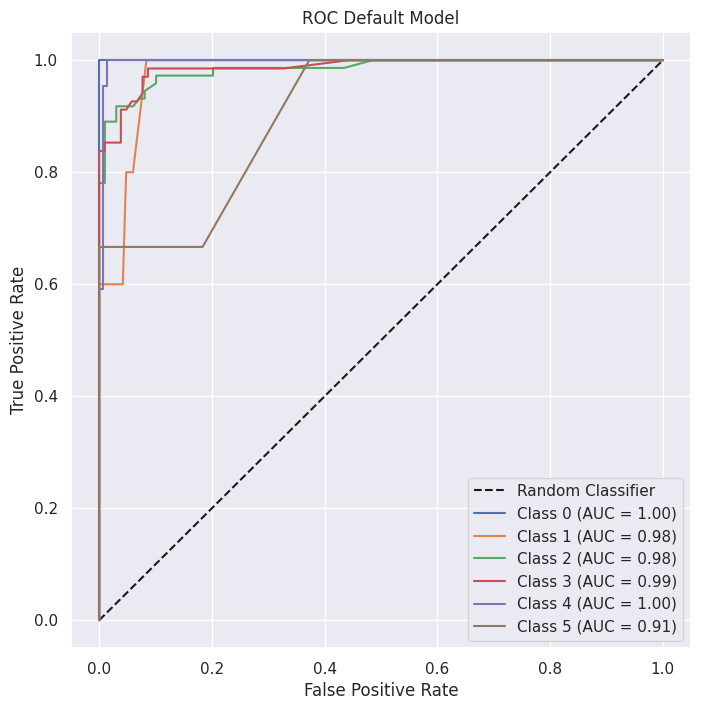

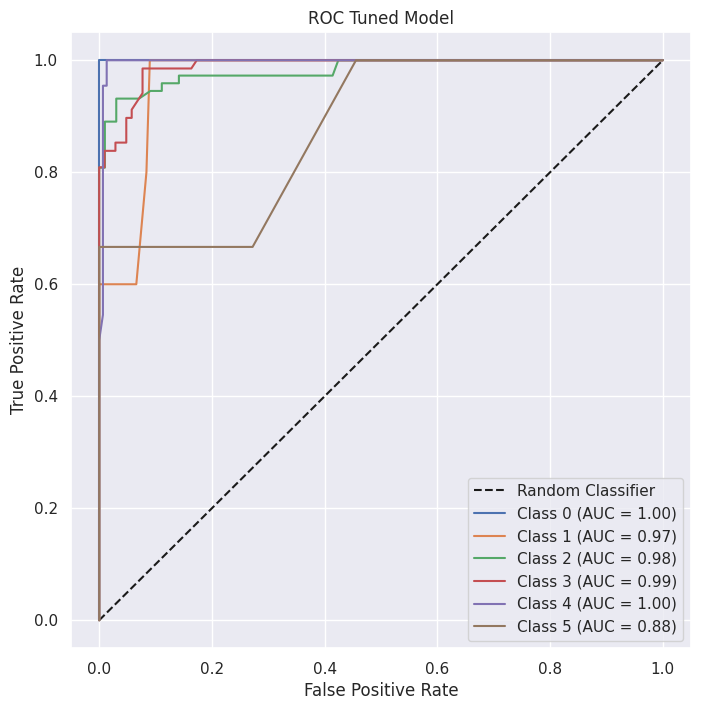

In [157]:
from sklearn.preprocessing import label_binarize

def plot_auc(y_test, y_pred_proba, titles):
    # Binarize the y_test labels for 'one-vs-rest' approach
    # global_all_classes is already defined as np.unique(y_encoded)
    y_test_binarized = label_binarize(y_test, classes=global_all_classes)

    plt.subplots(1, figsize=(8, 8))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal random guess line

    # Plot ROC curve for each class
    for i in range(len(global_all_classes)):
        if i < y_pred_proba.shape[1]: # Ensure class index exists in predicted probabilities
            fpr, tpr, _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f'Class {global_all_classes[i]} (AUC = {metrics.auc(fpr, tpr):.2f})')
        else:
            print(f"Warning: No probabilities available for class {global_all_classes[i]}")

    plt.title(titles)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_auc(y_test, y_pred_proba_default, 'ROC Default Model')
plot_auc(y_test, y_pred_proba_tuned, 'ROC Tuned Model')

Jadi, meskipun sudah dilakukan tuning (penyesuaian) pada model Random Forest untuk membuatnya lebih baik, hasilnya menunjukkan bahwa model awal sudah sangat bagus. Grafik ROC Curve untuk model awal dan model yang sudah disesuaikan terlihat hampir sama persis. Ini berarti model sudah punya kemampuan yang sangat baik dalam membedakan kualitas anggur sejak awal, sehingga penyesuaian lebih lanjut tidak membuat perbedaan yang besar pada performanya. Meskipun begitu, proses tuning tetap penting untuk memastikan model bekerja dalam pengaturan terbaiknya.



####Fitur Importance

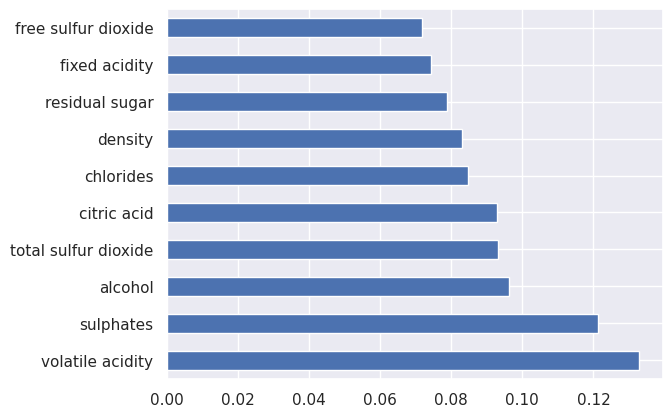

In [175]:
A=wine.drop(columns=['quality'])
b=wine['quality']
feat_importance = pd.Series(random_forest.feature_importances_, index=A.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

Terlihat bahwa volatile acidity, sulphates, alcohol, dan total sulfur dioxide merupakan fitur paling berpengaruh dalam memprediksi kualitas wine/anggur.

##Conclusion


In [158]:
print('Classification Report Model Tuned: \n', report_tuned)

Classification Report Model Tuned: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.75      0.60      0.67         5
           2       0.91      0.92      0.91        73
           3       0.91      0.88      0.90        68
           4       0.87      0.91      0.89        22
           5       0.67      0.67      0.67         3

    accuracy                           0.89       172
   macro avg       0.77      0.83      0.78       172
weighted avg       0.89      0.89      0.89       172



Precision dan Recall
1. Precision (Ketepatan): Dari semua kelas wine yang diperdiksi kelasnya oleh model, sekitar 91% di prediksi berkualitas kelas 2 dan kelas 3. 87% di kelas 4, 75% di kelas 1, 67% di kelas 5, dan 50% di kelas 0.

2. Recall (Ketepatan Deteksi): Model berhasil mengidentifikasi 100% untuk kelas 0, 60% untuk kelas 1, 92% untuk kelas 2, 88% kelas 3, 91% kelas 4, dan 67% untuk kelas 5.

**F1-score** : F1-score untuk kelas 0 adalah 0.67, kelas 1 0.67, kelas 2 0.91, kelas 3 0.90, kelas 4 0.89, dan kelas 5 0.67 yang merupakan rata-rata dari precision dan recall. F1-score yang baik menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall.

**Accuracy** : Model ini mampu memprediksi dengan benar sekitar 89% dari semua jenis anggur ke dalam kelas-kelas kualitas. Ini memberikan gambaran seberapa baik model dapat mengklasifikasikan kualitas anggur secara keseluruhan.

#Melakukan Prediksi Terhadap Data Kualitas Anggur (Testing)


In [159]:
import pandas as pd

# Load the new testing data
data_test = pd.read_csv('/content/data_testing.csv')

print("Original testing data info:")
display(data_test.info())

# Drop the 'Id' column if it exists, similar to how it was handled for training data
if 'Id' in data_test.columns:
    data_test_processed = data_test.drop('Id', axis=1)
    print("\nTesting data after dropping 'Id' column info:")
    display(data_test_processed.info())
else:
    data_test_processed = data_test.copy()
    print("\n'Id' column not found in testing data, proceeding with original data.")

# Ensure the columns match the training data used by the model
# (Assuming X_train has the correct column order and names)
# If there's a mismatch, this would be the place to reorder or align columns
missing_cols = set(X_train.columns) - set(data_test_processed.columns)
for c in missing_cols:
    data_test_processed[c] = 0 # Or other appropriate fill value if necessary

data_test_processed = data_test_processed[X_train.columns] # Reorder columns to match training data

print("\nFirst 5 rows of processed testing data:")
display(data_test_processed.head())

Original testing data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         286 non-null    float64
 1   volatile acidity      286 non-null    float64
 2   citric acid           286 non-null    float64
 3   residual sugar        286 non-null    float64
 4   chlorides             286 non-null    float64
 5   free sulfur dioxide   286 non-null    float64
 6   total sulfur dioxide  286 non-null    float64
 7   density               286 non-null    float64
 8   pH                    286 non-null    float64
 9   sulphates             286 non-null    float64
 10  alcohol               286 non-null    float64
 11  Id                    286 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 26.9 KB


None


Testing data after dropping 'Id' column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         286 non-null    float64
 1   volatile acidity      286 non-null    float64
 2   citric acid           286 non-null    float64
 3   residual sugar        286 non-null    float64
 4   chlorides             286 non-null    float64
 5   free sulfur dioxide   286 non-null    float64
 6   total sulfur dioxide  286 non-null    float64
 7   density               286 non-null    float64
 8   pH                    286 non-null    float64
 9   sulphates             286 non-null    float64
 10  alcohol               286 non-null    float64
dtypes: float64(11)
memory usage: 24.7 KB


None


First 5 rows of processed testing data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000
1,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
2,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000
3,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000
4,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000


In [160]:
# Make predictions using the best_rf_model
y_pred_new_test = best_rf_model.predict(data_test_processed)

# Since y_pred_new_test contains encoded labels (0-5), we need to inverse transform them
# using the same LabelEncoder that was used for y_raw
y_pred_new_test_original_labels = le.inverse_transform(y_pred_new_test)

# Display the predictions
print("Predicted wine quality for the new testing data:")
display(pd.Series(y_pred_new_test_original_labels).value_counts().sort_index())

# Optionally, you can add the predictions back to the original test data for better context
data_test['predicted_quality'] = y_pred_new_test_original_labels
print("\nTesting data with predicted quality:")
display(data_test.head())

Predicted wine quality for the new testing data:


,count
3,2
4,7
5,133
6,101
7,37
8,6



Testing data with predicted quality:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,predicted_quality
0,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222,5
1,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514,6
2,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417,5
3,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754,5
4,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516,5


In [166]:
# Create a DataFrame with 'Id' and 'predicted_quality'
results_df = data_test[['Id', 'predicted_quality']]

# Save the DataFrame to a CSV file
output_filename = 'hasilprediksi_030.csv'
results_df.to_csv(output_filename, index=False)

print(f"Prediksi kualitas wine berhasil disimpan ke '{output_filename}'")
print("Berikut adalah lima baris pertama dari file CSV yang dihasilkan:")
display(pd.read_csv(output_filename).head())

Prediksi kualitas wine berhasil disimpan ke 'hasilprediksi_030.csv'
Berikut adalah lima baris pertama dari file CSV yang dihasilkan:


,Id,predicted_quality
0,222,5
1,1514,6
2,417,5
3,754,5
4,516,5
